In [1]:
import pandas as pd
from scipy.stats.distributions import gamma
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format ='retina'
sns.set()

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/data_cafe_prep.csv")
df.head()

name  price_level  rating  \
0                        Sytaya Akula          NaN     3.9   
1                    Кальянная Hustle          NaN     5.0   
2                            Wood bar          2.0     4.7   
3                Кальянная 1/2 OF YOU          NaN     4.7   
4  Антикафе-кальянная Terra 13 Lounge          NaN     4.7   

                                    types  user_ratings_total        lat  \
0  'cafe',  'bar',  'restaurant',  'food'                37.0  59.915517   
1  'cafe',  'bar',  'restaurant',  'food'                27.0  59.924627   
2  'cafe',  'bar',  'restaurant',  'food'               308.0  59.926036   
3  'cafe',  'bar',  'restaurant',  'food'                97.0  59.931000   
4  'cafe',  'bar',  'restaurant',  'food'                24.0  59.934828   

         lng                   closest_metro  closest_metro_km  \
0  30.309495  ['Технологический институт-1']          0.518818   
1  30.356393          ['Лиговский проспект']          0.437038   
2  30.352349                 ['Достоевская']          0.296679   
3  30.359420           ['Площадь Восстания']          0.075226   
4  30.335022               ['Гостиный Двор']          0.111416   

   Quantity of nearest museum  Quantity of nearest art_gallery  \
0                          16                                4   
1                          36                               35   
2                          52                               43   
3                          71                               49   
4                         134                               80   

   Quantity of nearest shopping_mall  \
0                                  9   
1                                 34   
2                                 49   
3                                 36   
4                                 31   

   Quantity of nearest places_tourist_attraction  \
0                                             30   
1                                             52   
2                                             67   
3                                             70   
4                                            182   

   Quantity of nearest same establishment  opportunity_take_away  \
0                                      94                      0   
1                                     119                      0   
2                                     136                      0   
3                                     119                      0   
4                                      80                      0   

   distance_to_center, km  result  
0                2.243226   144.3  
1                2.080040   135.0  
2                1.805490  1447.6  
3                1.987175   455.9  
4                0.594867   112.8

## Одиночные распределения

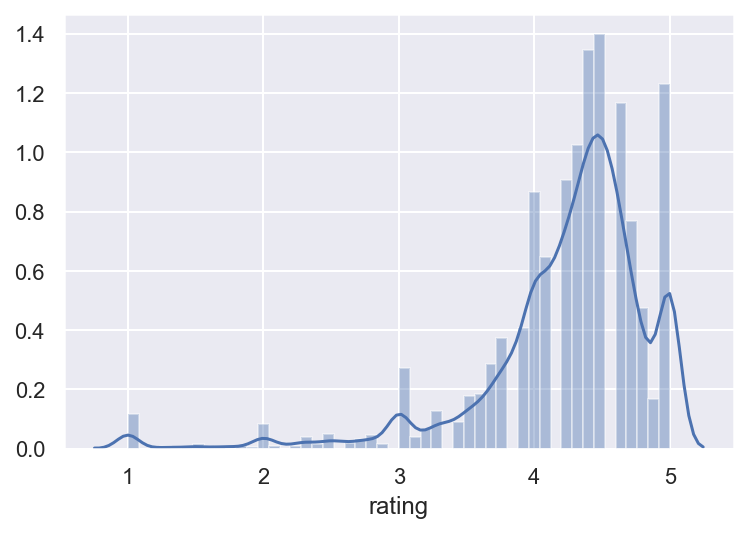

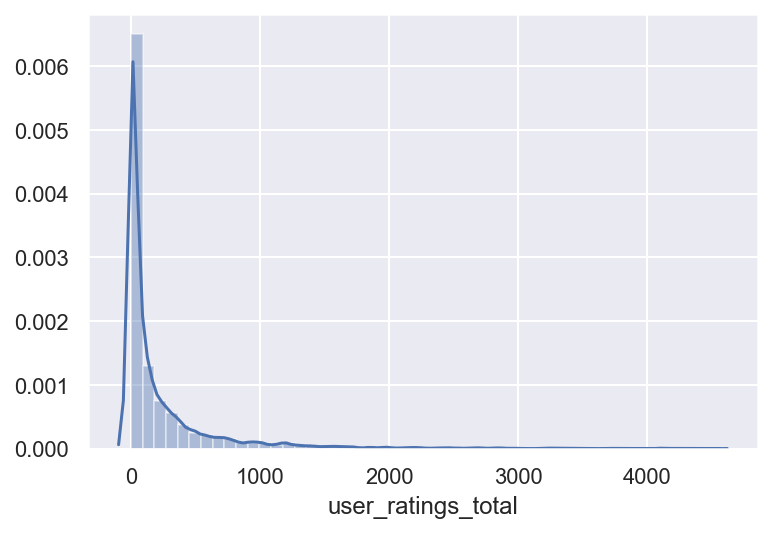

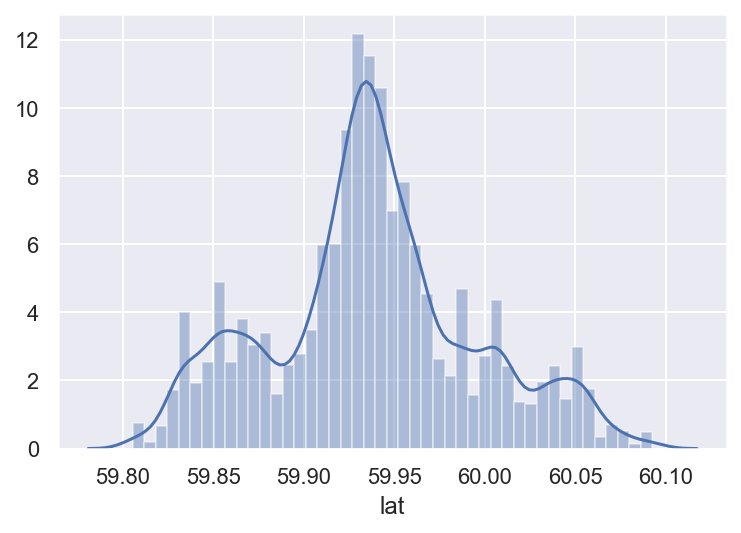

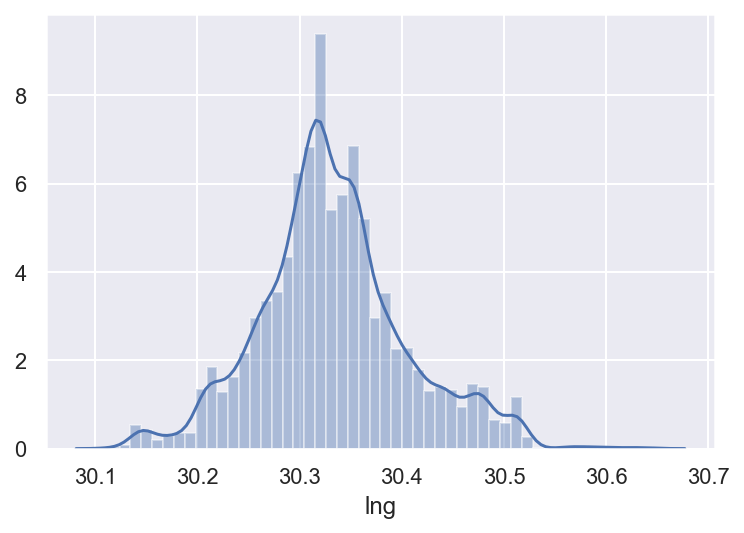

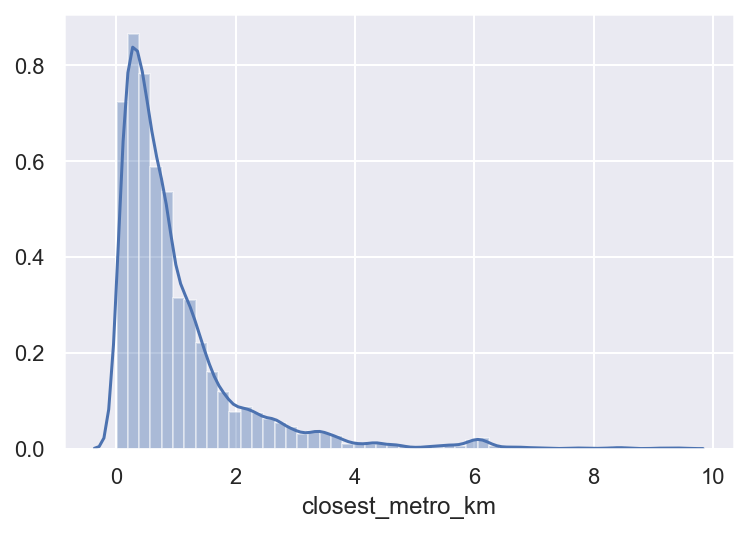

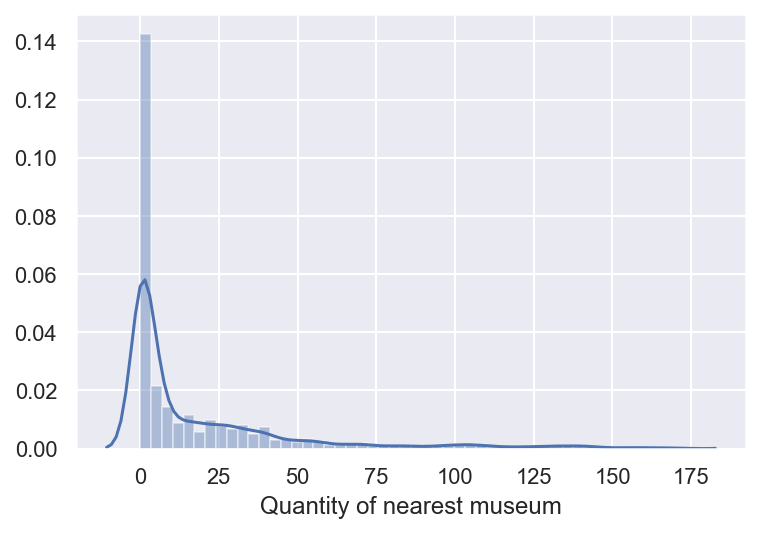

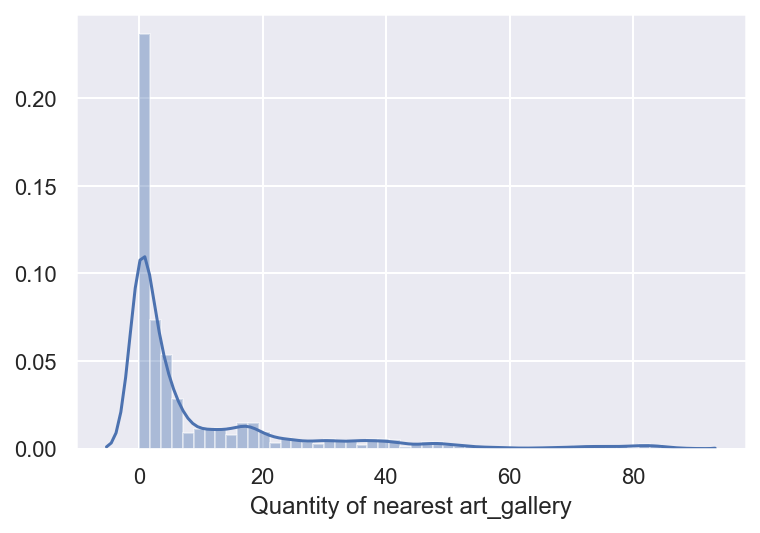

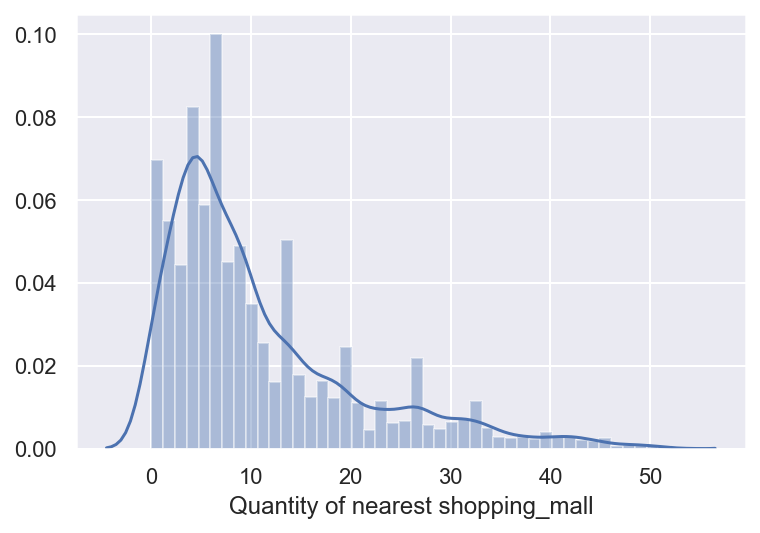

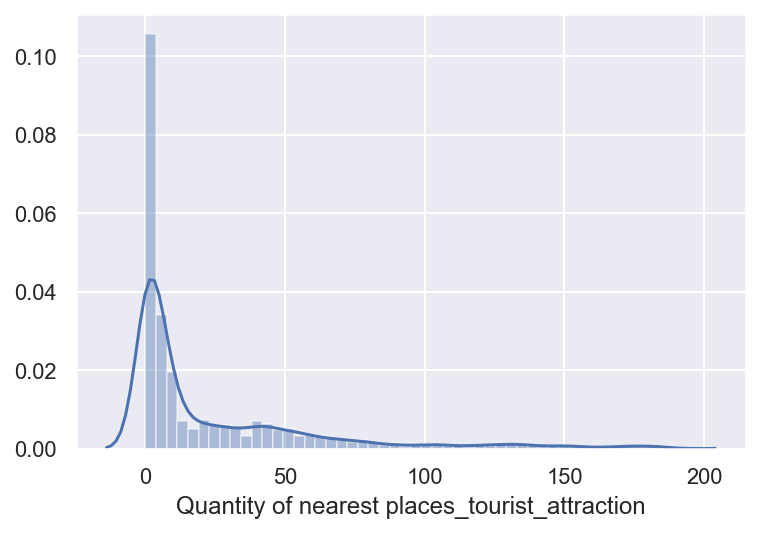

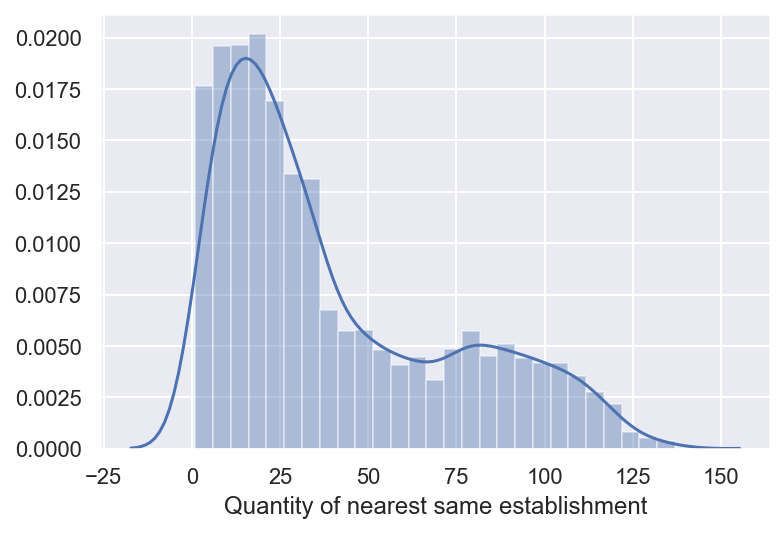

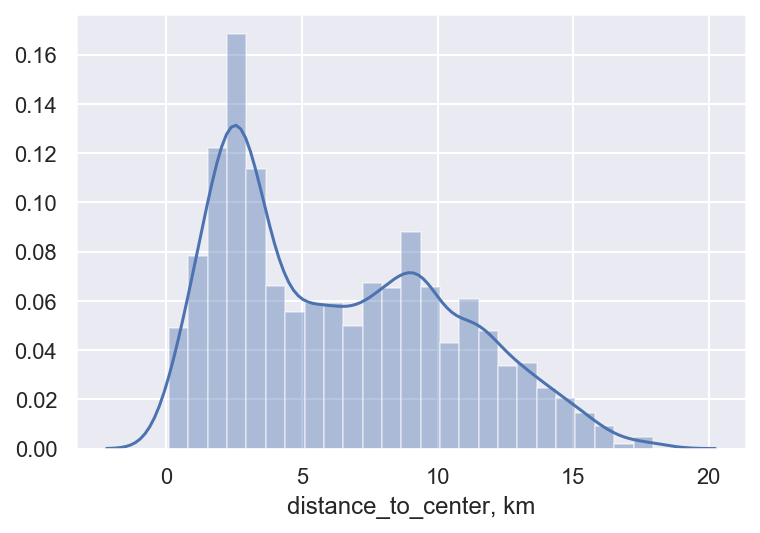

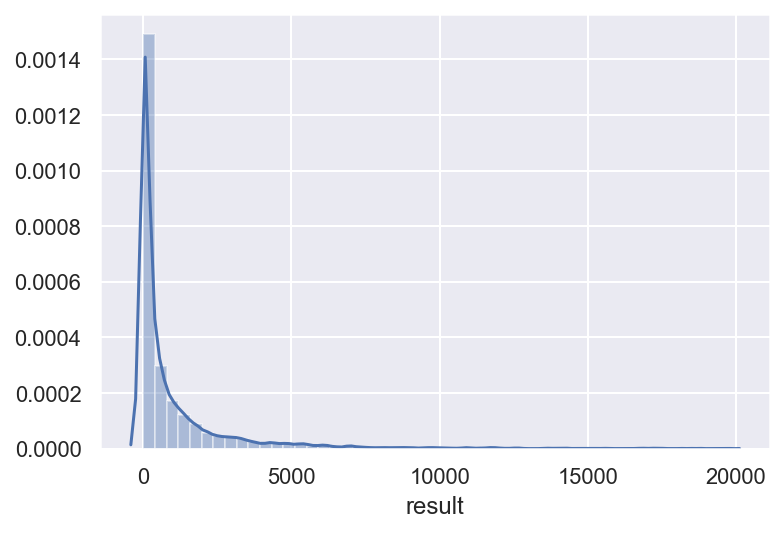

In [3]:
features = df.drop(columns=['price_level', 'name', 'types', 'closest_metro', 'opportunity_take_away'])
for column in features:
    sns.distplot(df[column])
#     plt.savefig(f'plots/{column}.png', dpi=200)
    plt.show()

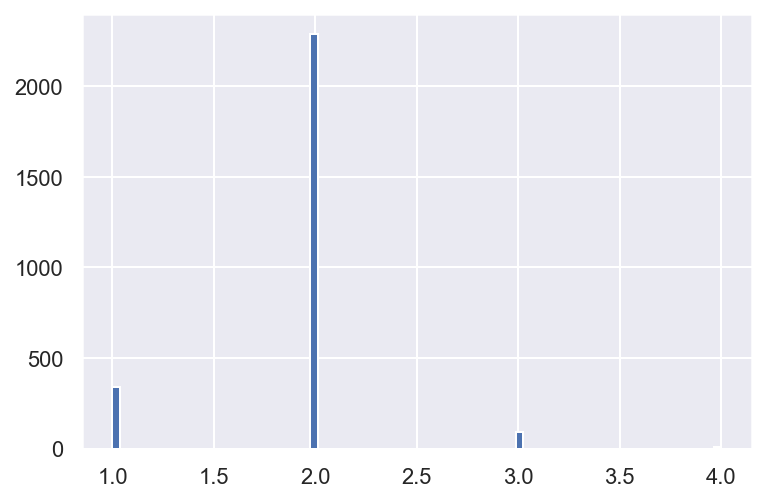

In [4]:
df['price_level'].hist(bins=80); # нормальное распределение

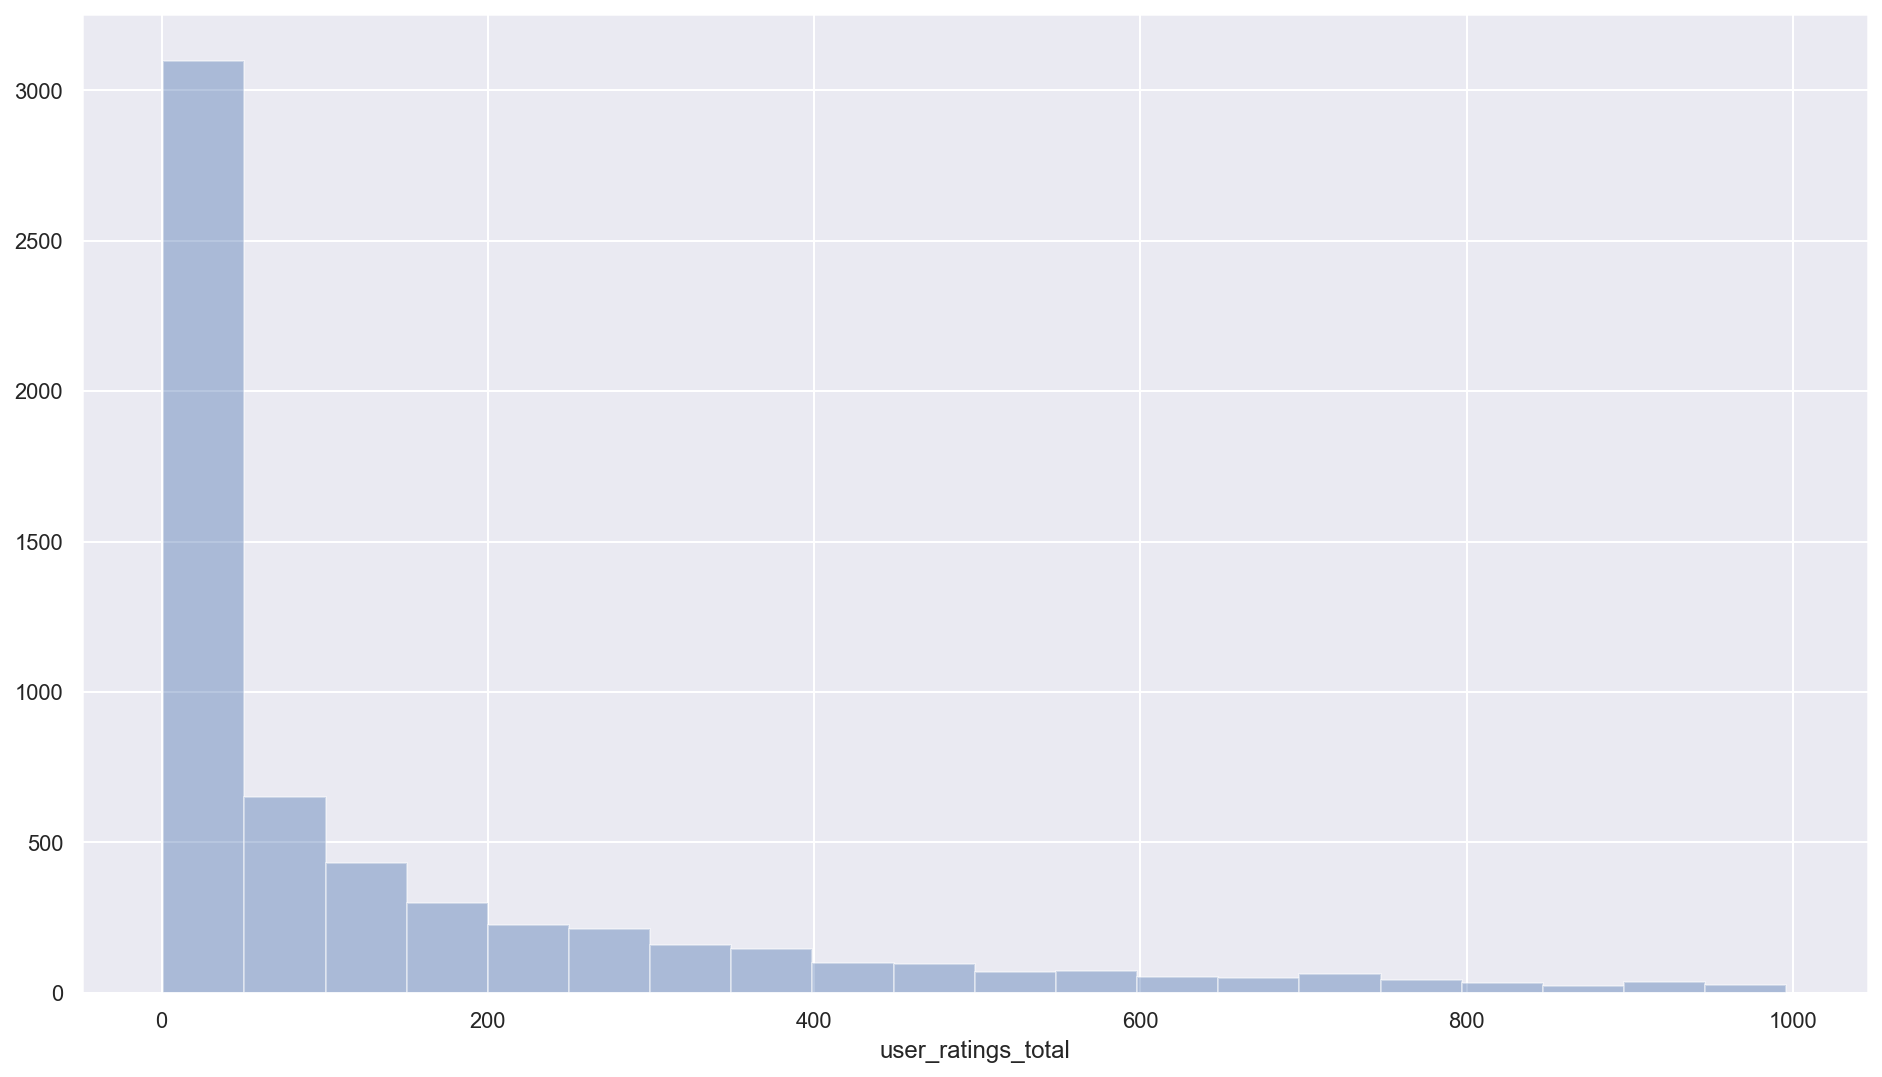

In [5]:
plt.figure(figsize=(16,9))
sns.distplot(df[df['user_ratings_total'] < 1000]['user_ratings_total'], bins=20, kde=False)
plt.savefig('plots/user_ratings_total', dpi=200)

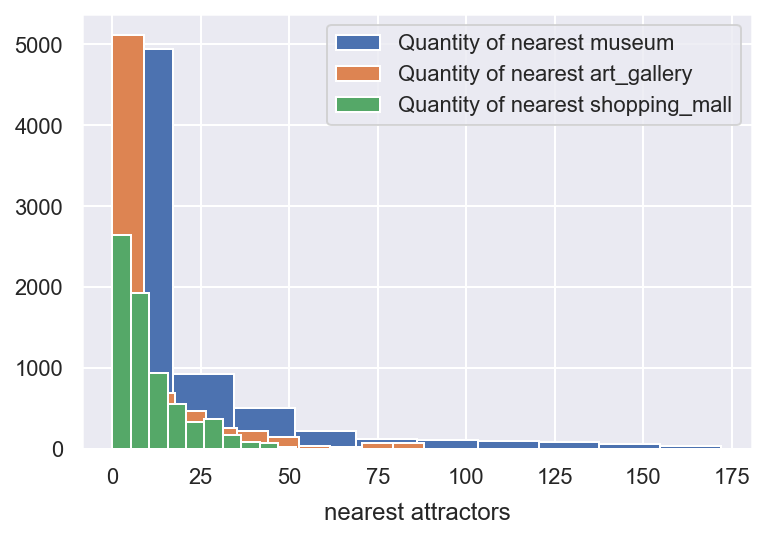

In [163]:
plt.hist(df['Quantity of nearest museum'], label='Quantity of nearest museum')
plt.hist(df['Quantity of nearest art_gallery'], label='Quantity of nearest art_gallery')
plt.hist(df['Quantity of nearest shopping_mall'], label='Quantity of nearest shopping_mall')
plt.title('nearest attractors', y=-0.19)
plt.legend()

## Статистика

In [6]:
# средние значения по столбцам
df.mean()

price_level                                        1.914621
rating                                             4.235556
user_ratings_total                               226.898136
lat                                               59.937156
lng                                               30.332970
closest_metro_km                                   0.988469
Quantity of nearest museum                        19.213689
Quantity of nearest art_gallery                    9.893959
Quantity of nearest shopping_mall                 10.925129
Quantity of nearest places_tourist_attraction     24.607005
Quantity of nearest same establishment            40.421433
opportunity_take_away                              0.024582
distance_to_center, km                             6.351844
result                                           988.719875
dtype: float64

In [7]:
# отклонения
df.std()

price_level                                         0.404840
rating                                              0.645869
user_ratings_total                                447.710711
lat                                                 0.057282
lng                                                 0.072794
closest_metro_km                                    1.088840
Quantity of nearest museum                         31.576367
Quantity of nearest art_gallery                    16.524409
Quantity of nearest shopping_mall                   9.894308
Quantity of nearest places_tourist_attraction      37.665043
Quantity of nearest same establishment             33.075966
opportunity_take_away                               0.154861
distance_to_center, km                              4.157027
result                                           1946.026596
dtype: float64

In [8]:
# Группируем транзакции по ближайшему метро, получаем среднее значение величины рейтинга
def mean_amount_by_metro(df):
    df_metro = df.groupby('closest_metro', as_index=False).agg({"user_ratings_total": "mean"})
    # Сортируем по убыванию
    df_metro = df_metro.sort_values('user_ratings_total', ascending=False)

    return df_metro

df_metro = mean_amount_by_metro(df)
df_metro.head(10)

closest_metro  user_ratings_total
12           ['Достоевская']          633.814815
9          ['Гостиный Двор']          604.706587
37     ['Площадь Восстания']          438.841202
1         ['Адмиралтейская']          384.533333
58       ['проспект  Славы']          361.607143
32           ['Парк Победы']          322.845238
47               ['Садовая']          312.000000
10  ['Гражданский проспект']          289.680000
31                ['Озерки']          266.112245
8            ['Горьковская']          259.636364

In [9]:
df.closest_metro.value_counts()

['Чернышевская']                     265
['Василеостровская']                 259
['Площадь Восстания']                233
['Проспект Ветеранов']               224
['Садовая']                          215
['Комендантский проспект']           197
['Петроградская']                    176
['Улица Дыбенко']                    171
['Гостиный Двор']                    167
['Ладожская']                        156
['Горьковская']                      154
['Приморская']                       153
['Адмиралтейская']                   150
['Беговая']                          147
['Чкаловская']                       147
['Проспект Просвещения']             144
['Балтийская']                       131
['Звёздная']                         126
['Московская']                       123
['Проспект Большевиков']             111
['Площадь Ленина']                   105
['Новочеркасская']                   105
['Спортивная-1']                     103
['Нарвская']                          99
['Озерки']      

In [10]:
df.corr(method='pearson') # нецелеообразно применение из-за нелинейности

price_level    rating  \
price_level                                       1.000000  0.066606   
rating                                            0.066606  1.000000   
user_ratings_total                                0.126250  0.095741   
lat                                               0.026051 -0.001508   
lng                                              -0.011281 -0.048220   
closest_metro_km                                  0.006666 -0.038245   
Quantity of nearest museum                        0.094902  0.101396   
Quantity of nearest art_gallery                   0.072074  0.102254   
Quantity of nearest shopping_mall                -0.001445  0.016442   
Quantity of nearest places_tourist_attraction     0.094486  0.109068   
Quantity of nearest same establishment           -0.023192  0.121321   
opportunity_take_away                             0.037025 -0.015327   
distance_to_center, km                            0.009888 -0.121101   
result                                            0.129927  0.108126   

                                               user_ratings_total       lat  \
price_level                                              0.126250  0.026051   
rating                                                   0.095741 -0.001508   
user_ratings_total                                       1.000000  0.003238   
lat                                                      0.003238  1.000000   
lng                                                     -0.005132 -0.008495   
closest_metro_km                                        -0.101267 -0.066025   
Quantity of nearest museum                               0.224453 -0.004476   
Quantity of nearest art_gallery                          0.242469  0.019187   
Quantity of nearest shopping_mall                        0.170089 -0.034419   
Quantity of nearest places_tourist_attraction            0.227821  0.001026   
Quantity of nearest same establishment                   0.166814  0.026491   
opportunity_take_away                                    0.118771  0.028339   
distance_to_center, km                                  -0.109768  0.067538   
result                                                   0.998355  0.003119   

                                                    lng  closest_metro_km  \
price_level                                   -0.011281          0.006666   
rating                                        -0.048220         -0.038245   
user_ratings_total                            -0.005132         -0.101267   
lat                                           -0.008495         -0.066025   
lng                                            1.000000         -0.062205   
closest_metro_km                              -0.062205          1.000000   
Quantity of nearest museum                    -0.071682         -0.258848   
Quantity of nearest art_gallery               -0.031445         -0.279036   
Quantity of nearest shopping_mall              0.067108         -0.377383   
Quantity of nearest places_tourist_attraction -0.078171         -0.270881   
Quantity of nearest same establishment        -0.106905         -0.408335   
opportunity_take_away                         -0.008792          0.069349   
distance_to_center, km                         0.112958          0.473298   
result                                        -0.006008         -0.101741   

                                               Quantity of nearest museum  \
price_level                                                      0.094902   
rating                                                           0.101396   
user_ratings_total                                               0.224453   
lat                                                             -0.004476   
lng                                                             -0.071682   
closest_metro_km                                                -0.258848   
Quantity of nearest museum                                       1.000000   
Quantity

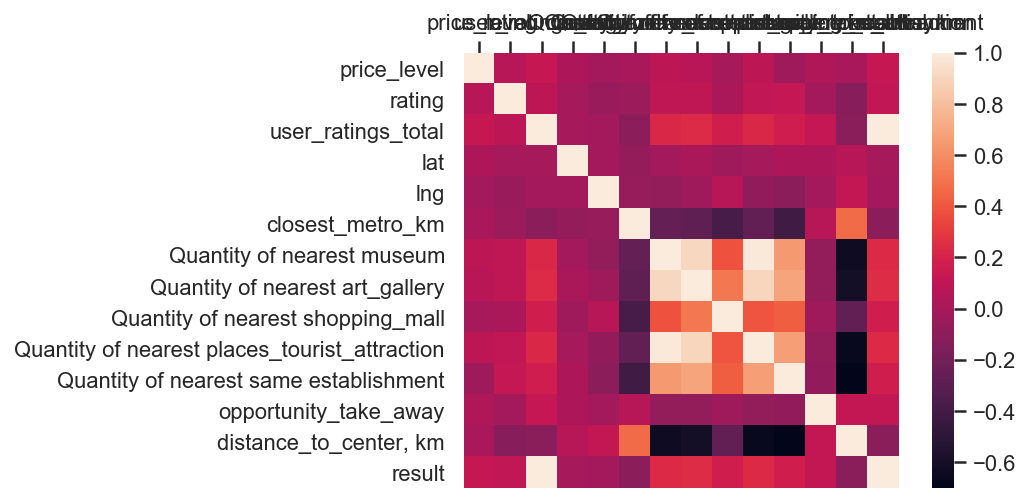

In [12]:
corrmat = df.corr()
sns.heatmap(corrmat, vmax=1., square = True).xaxis.tick_top()

In [13]:
corrmat['user_ratings_total']

price_level                                      0.126250
rating                                           0.095741
user_ratings_total                               1.000000
lat                                              0.003238
lng                                             -0.005132
closest_metro_km                                -0.101267
Quantity of nearest museum                       0.224453
Quantity of nearest art_gallery                  0.242469
Quantity of nearest shopping_mall                0.170089
Quantity of nearest places_tourist_attraction    0.227821
Quantity of nearest same establishment           0.166814
opportunity_take_away                            0.118771
distance_to_center, km                          -0.109768
result                                           0.998355
Name: user_ratings_total, dtype: float64

In [14]:
# Группируем транзакции по категории, получаем среднее значение величины рейтинга
def mean_amount_by_types(df):
    df_types = df.groupby('types', as_index=False).agg({"user_ratings_total":"mean"})
    # Сортируем по убыванию
    df_metro = df_types.sort_values('user_ratings_total', ascending=False)

    return df_metro

df_type = mean_amount_by_types(df)
df_type.head(20)

types  user_ratings_total
6  'meal_delivery',  'meal_takeaway',  'restauran...          561.830065
1                      'bar',  'restaurant',  'food'          481.607843
8                              'restaurant',  'food'          331.104950
2   'cafe',  'bakery',  'food',  'point_of_interest'          274.928910
3             'cafe',  'bar',  'restaurant',  'food'          227.483871
5                     'cafe',  'restaurant',  'food'          214.708812
7                               'night_club',  'bar'          209.180000
0                                              'bar'          173.832155
9            'restaurant',  'meal_delivery',  'food'          168.542857
4                                    'cafe',  'food'           84.097349

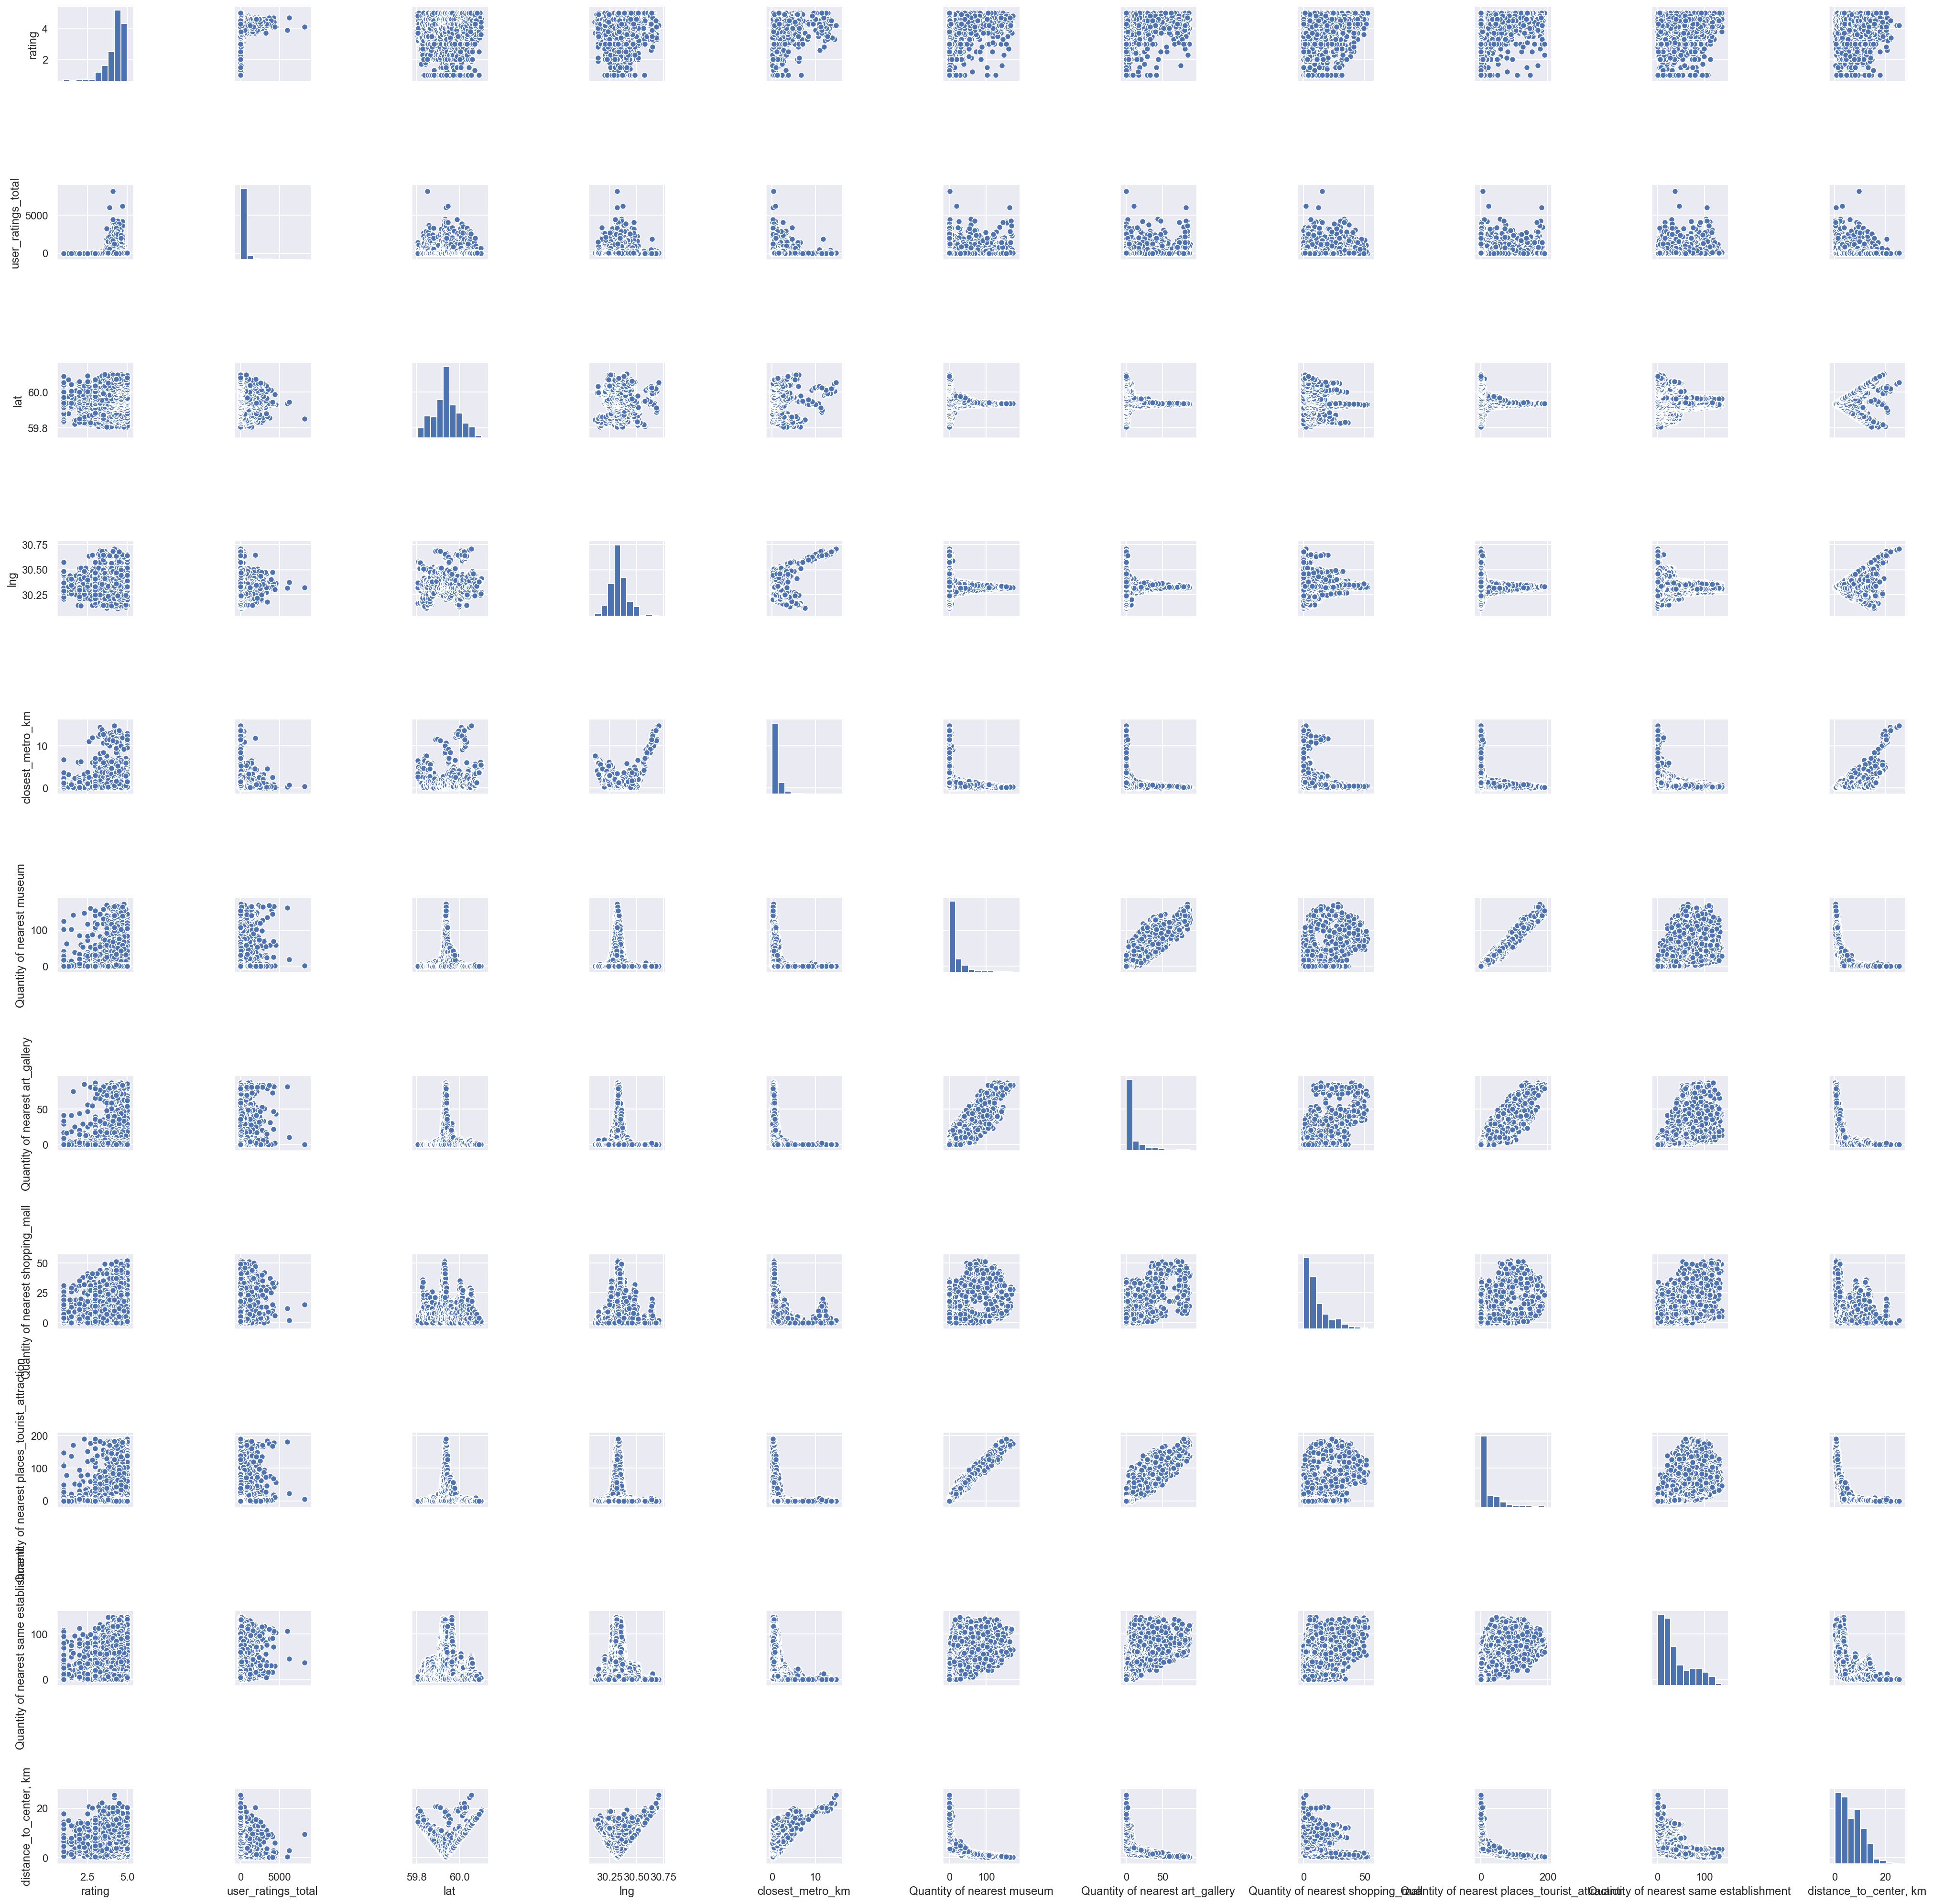

In [179]:
sns.pairplot(features)

In [263]:
df.isna().sum()

name                                             0
price_level                                      0
rating                                           0
types                                            0
user_ratings_total                               0
lat                                              0
lng                                              0
closest_metro                                    0
closest_metro_km                                 0
Quantity of nearest museum                       0
Quantity of nearest art_gallery                  0
Quantity of nearest shopping_mall                0
Quantity of nearest places_tourist_attraction    0
Quantity of nearest same establishment           0
opportunity_take_away                            0
distance_to_center, km                           0
dtype: int64

In [16]:
df = df.dropna(subset=['user_ratings_total'])
len(df)

6224

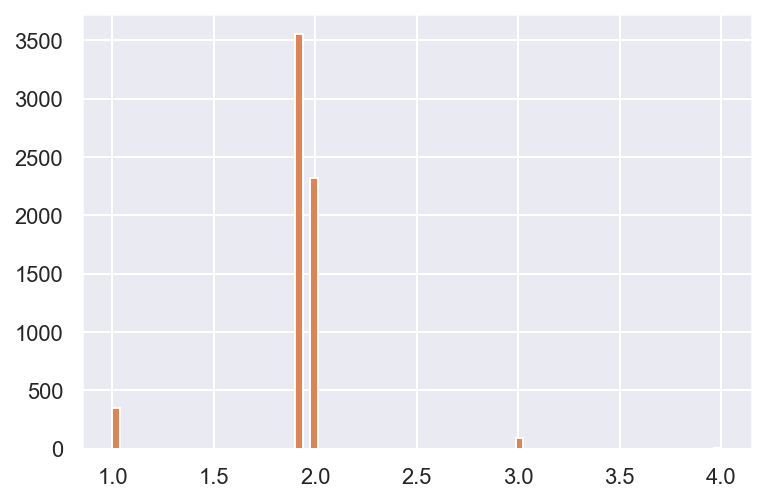

In [262]:
df['price_level'].hist(bins=80) # нормальное распределение
# так как это номальное распределение - заменяем na на среднее
df.fillna(value={'price_level': df.price_level.mean()}, inplace=True)
df['price_level'].hist(bins=80) # нормальное расппрделение

## seminar 1. Statistical data modelling

In [187]:
# fitting data to probability distribution
# check type of distribution

In [188]:
df_var = df.var()
df_var

price_level                                           0.064734
rating                                                0.416244
user_ratings_total                               221456.594049
lat                                                   0.003283
lng                                                   0.005250
closest_metro_km                                      1.147074
Quantity of nearest museum                          955.878932
Quantity of nearest art_gallery                     260.039028
Quantity of nearest shopping_mall                    94.470425
Quantity of nearest places_tourist_attraction      1361.901006
Quantity of nearest same establishment             1073.559336
opportunity_take_away                                 0.023433
distance_to_center, km                               16.998556
dtype: float64

In [189]:
df_mean = df.mean()
df_mean

price_level                                        1.912179
rating                                             4.235757
user_ratings_total                               230.253323
lat                                               59.937343
lng                                               30.332510
closest_metro_km                                   0.990954
Quantity of nearest museum                        18.592472
Quantity of nearest art_gallery                    9.521591
Quantity of nearest shopping_mall                 10.762926
Quantity of nearest places_tourist_attraction     23.854119
Quantity of nearest same establishment            39.763778
opportunity_take_away                              0.024006
distance_to_center, km                             6.363158
dtype: float64

In [244]:
# общее количесвто категорий после очитски от типов с совсем маленьким количеством представленных заведений
unique_types = len(df_type)
amount_total = df['user_ratings_total'].sum()

print(f'Количество типов: {unique_types}')
print(f'Общий объем посещений общепита: {int(amount_total)}')

Количество типов: 10
Общий объем посещений общепита: 1437932


In [245]:
df_type

types  user_ratings_total
6  'meal_delivery',  'meal_takeaway',  'restauran...          612.503226
1                      'bar',  'restaurant',  'food'          481.607843
8                              'restaurant',  'food'          336.053400
2   'cafe',  'bakery',  'food',  'point_of_interest'          274.009434
3             'cafe',  'bar',  'restaurant',  'food'          227.296000
5                     'cafe',  'restaurant',  'food'          214.708812
7                               'night_club',  'bar'          209.180000
0                                              'bar'          176.587719
9            'restaurant',  'meal_delivery',  'food'          168.542857
4                                    'cafe',  'food'           84.111063

Text(0, 0.5, 'Количество посещений')

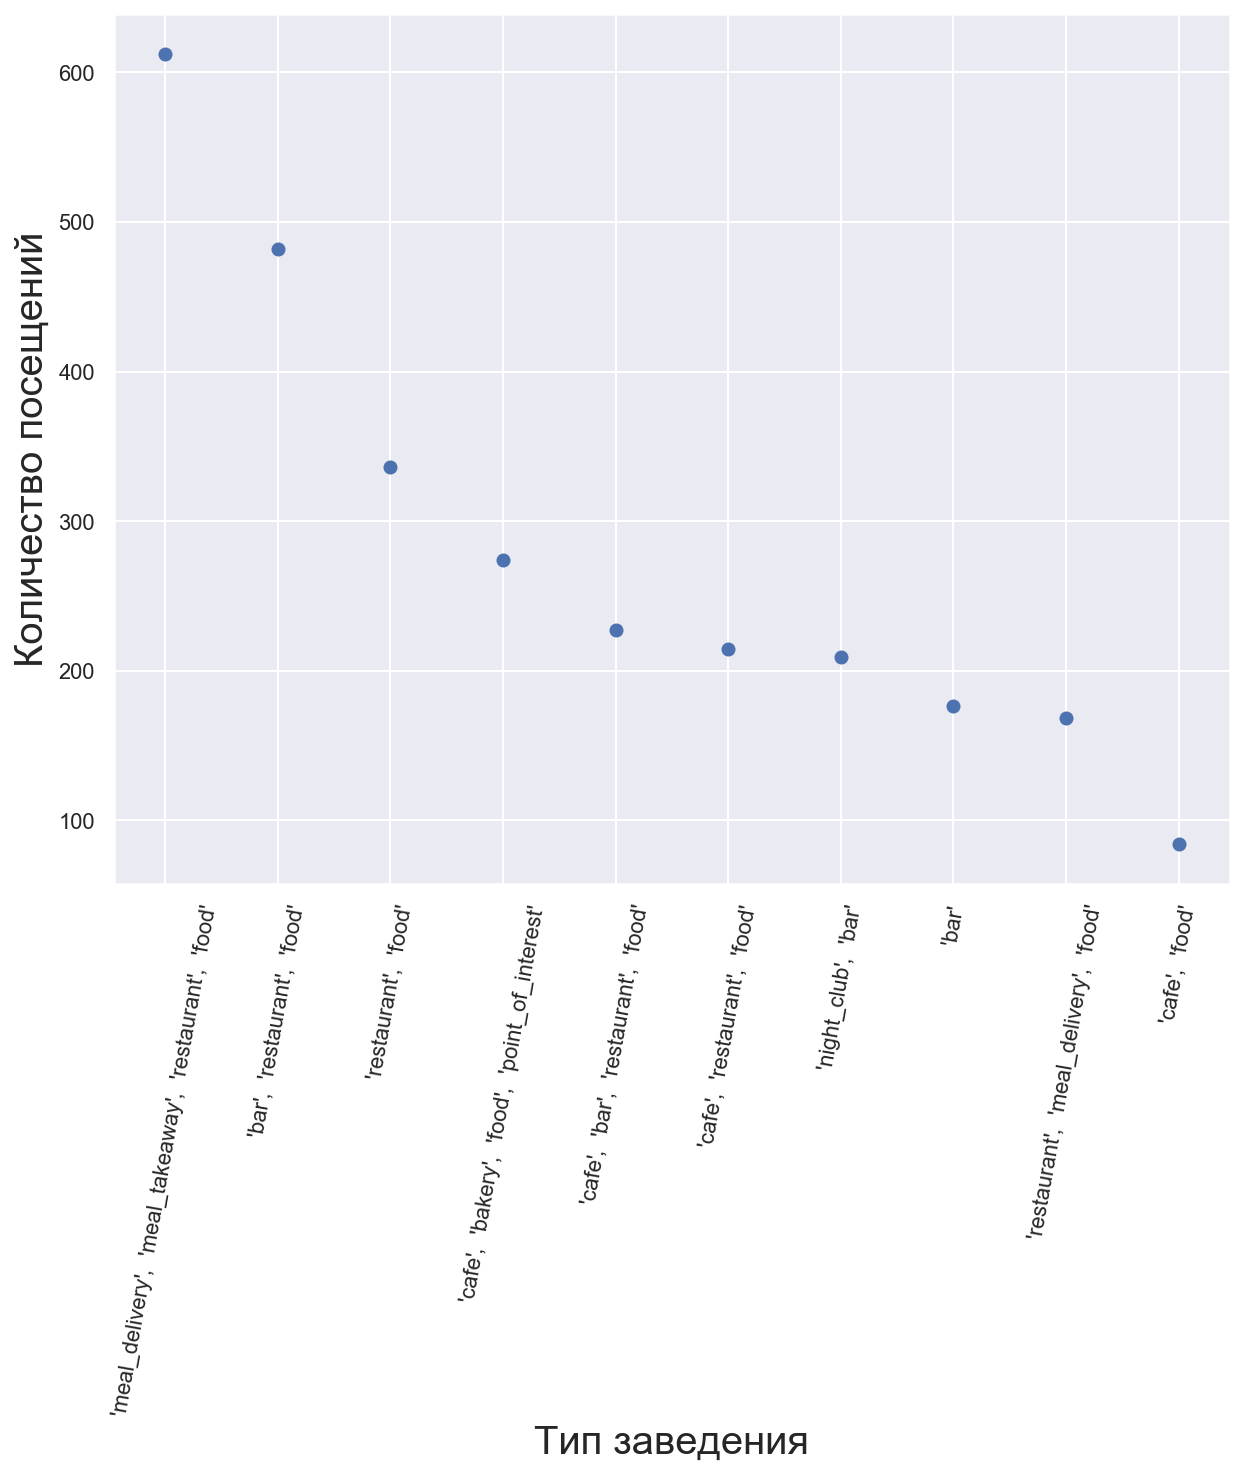

In [246]:
# рисуем карту для типов
plt.figure(figsize=(10, 8))

#указываем X и Y
plt.scatter(df_type['types'], df_type['user_ratings_total'])

plt.xticks(rotation=80)

plt.xlabel(u'Тип заведения', fontsize=20)
plt.ylabel(u'Количество посещений', fontsize=20)

In [255]:
df_metro['closest_metro']

12                      ['Достоевская']
9                     ['Гостиный Двор']
37                ['Площадь Восстания']
1                    ['Адмиралтейская']
58                  ['проспект  Славы']
32                      ['Парк Победы']
47                          ['Садовая']
26                       ['Московская']
10             ['Гражданский проспект']
54                     ['Чернышевская']
31                           ['Озерки']
50       ['Технологический институт-1']
8                       ['Горьковская']
45                       ['Пушкинская']
34                    ['Петроградская']
48                     ['Спортивная-1']
21               ['Ленинский проспект']
44             ['Проспект Просвещения']
2                     ['Академическая']
42             ['Проспект Большевиков']
43               ['Проспект Ветеранов']
38                   ['Площадь Ленина']
46                         ['Рыбацкое']
17           ['Комендантский проспект']
6                  ['Василеостровская']


Text(0, 0.5, 'Количество посещений')

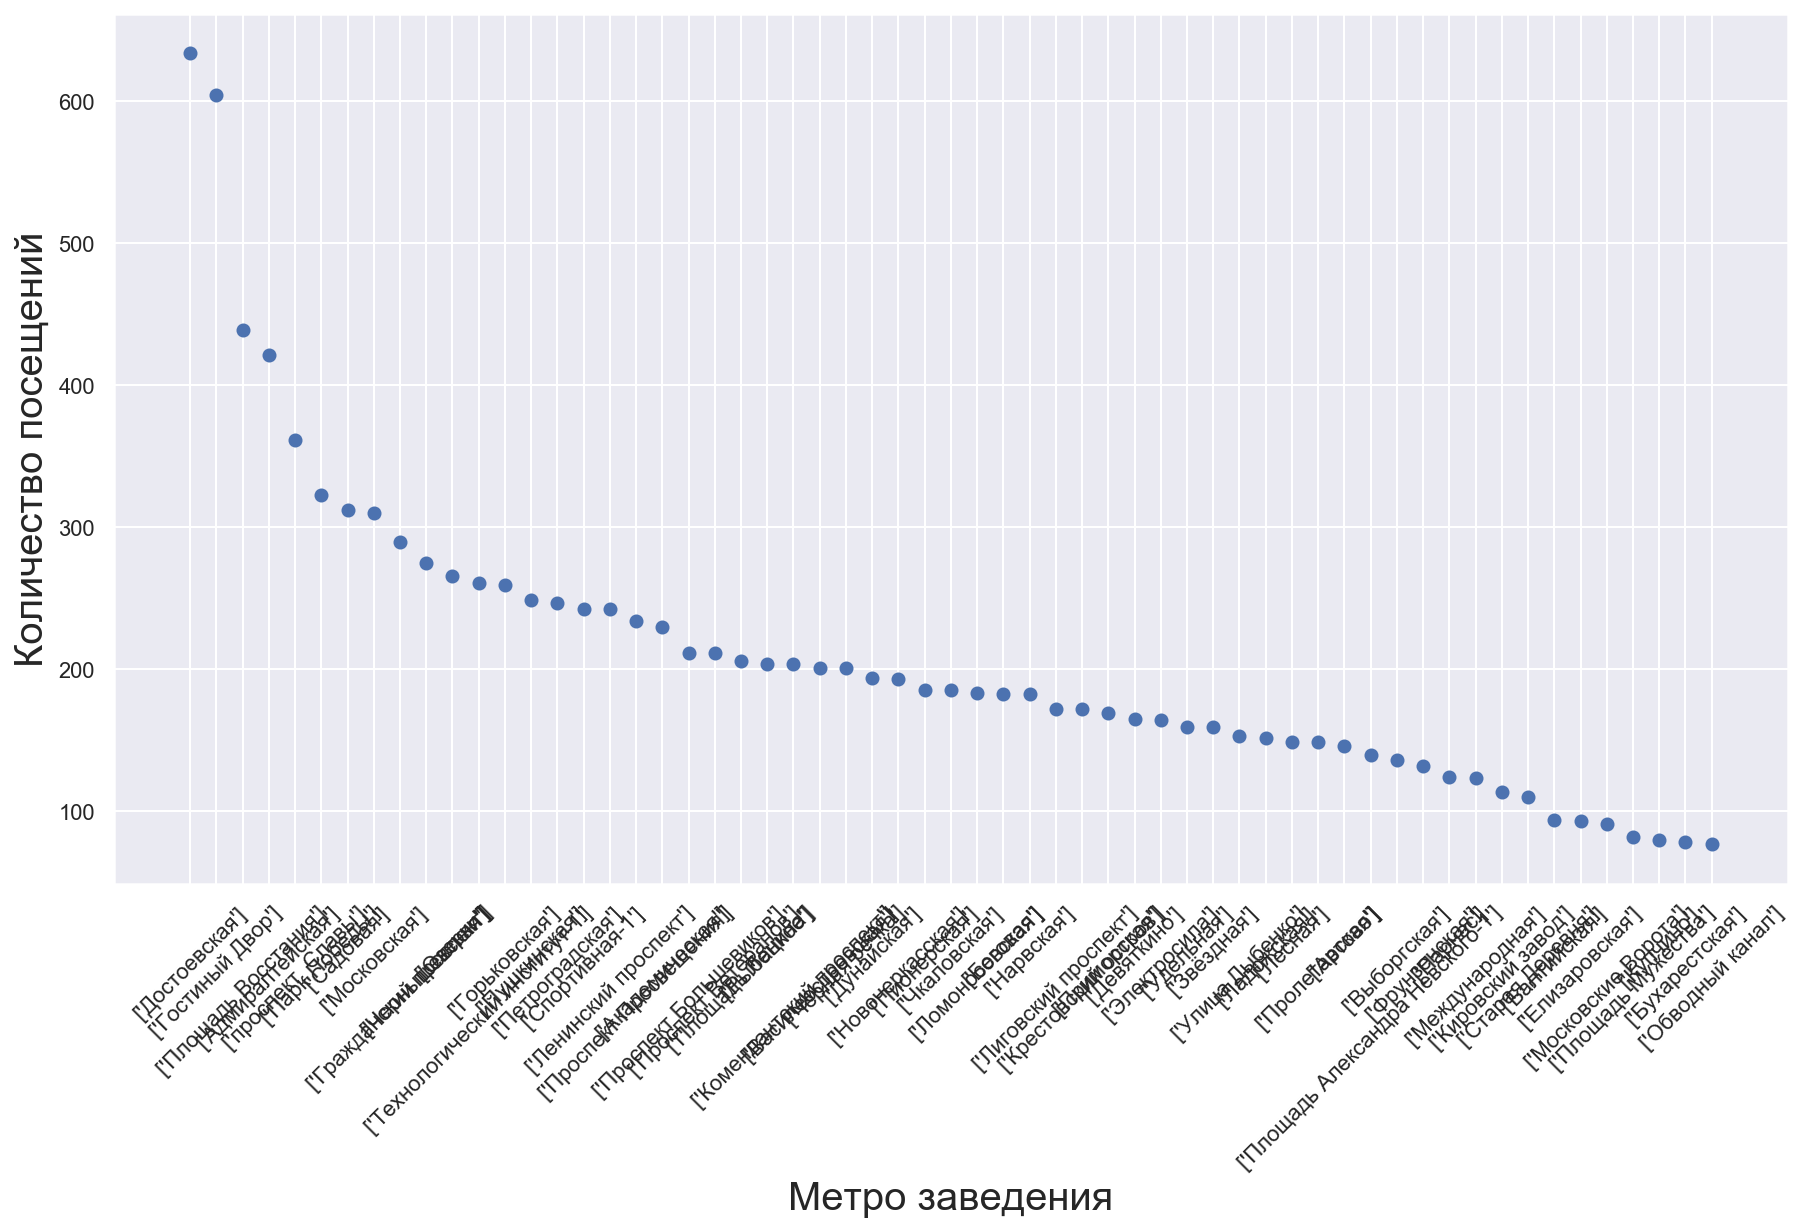

In [254]:
# рисуем карту для метро
plt.figure(figsize=(15, 8))

#указываем X и Y
plt.scatter(df_metro['closest_metro'],df_metro['user_ratings_total'])

plt.xticks(rotation=45)

plt.xlabel(u'Метро заведения', fontsize = 20)
plt.ylabel(u'Количество посещений', fontsize = 20)

In [265]:
# определим количество клиентов, которое привлечет кафе при открытии около определнной ст. метро типа ресторан или бар
# для метро чернышкевская

from math import sqrt
import scipy.stats


df_metro = df.loc[df['closest_metro'] == "['Чернышевская']"]

type1, type2 = "['restaurant', 'food', 'point_of_interest', 'establishment']", "['bar', 'point_of_interest', 'establishment']"

df_type_first = df_metro.loc[df_metro['types'] == type1]
df_type_second = df_metro.loc[df_metro['types'] == type2]

print(f'Количество кафе около метро  {type1}: {len(df_type_first)}')
print(f'Количество кафе около метро  {type2}: {len(df_type_second)}')

Количество кафе около метро  ['restaurant', 'food', 'point_of_interest', 'establishment']: 87
Количество кафе около метро  ['bar', 'point_of_interest', 'establishment']: 33


In [266]:
# Вычисление выборочного среднего, дисперсии, СКО, медианы
mean = df_metro['user_ratings_total'].mean()
var = df_metro['user_ratings_total'].var()
std = df_metro['user_ratings_total'].std()
median = df_metro['user_ratings_total'].median()
moda = df_metro['user_ratings_total'].mode()

# Вычисление усеченного среднего, с усечением 10% наибольших и наименьших значений
trimmed_mean = scipy.stats.trim_mean(df_metro['user_ratings_total'], proportiontocut=0.1)

#median absolute deviation
def mad(df):
    #параметр для логнормального распределения
    
    params = scipy.stats.gamma.fit(df_type_first['user_ratings_total'])
    percs = np.linspace(0, 100, 21)

    k = scipy.stats.lognorm.ppf(percs/100.0, *params)
    median = df.median()
    
    return  k[0] * np.median(np.fabs(df - median))


# Вычисление MAD-характеристики (Median Absolute Deviation)
mad_value = mad(df_metro['user_ratings_total'])

print(f'Средний размер посещаемости кафе по метро: среднее = {int(mean)}, дисперсия = {int(var)}, СКО = {int(std)}\n'
      f'медиана = {int(median)} , усеченное среднее = {int(trimmed_mean)}, MAD = {int(mad_value)}')

Средний размер посещаемости кафе по метро: среднее = 274, дисперсия = 275948, СКО = 525
медиана = 107 , усеченное среднее = 172, MAD = 103


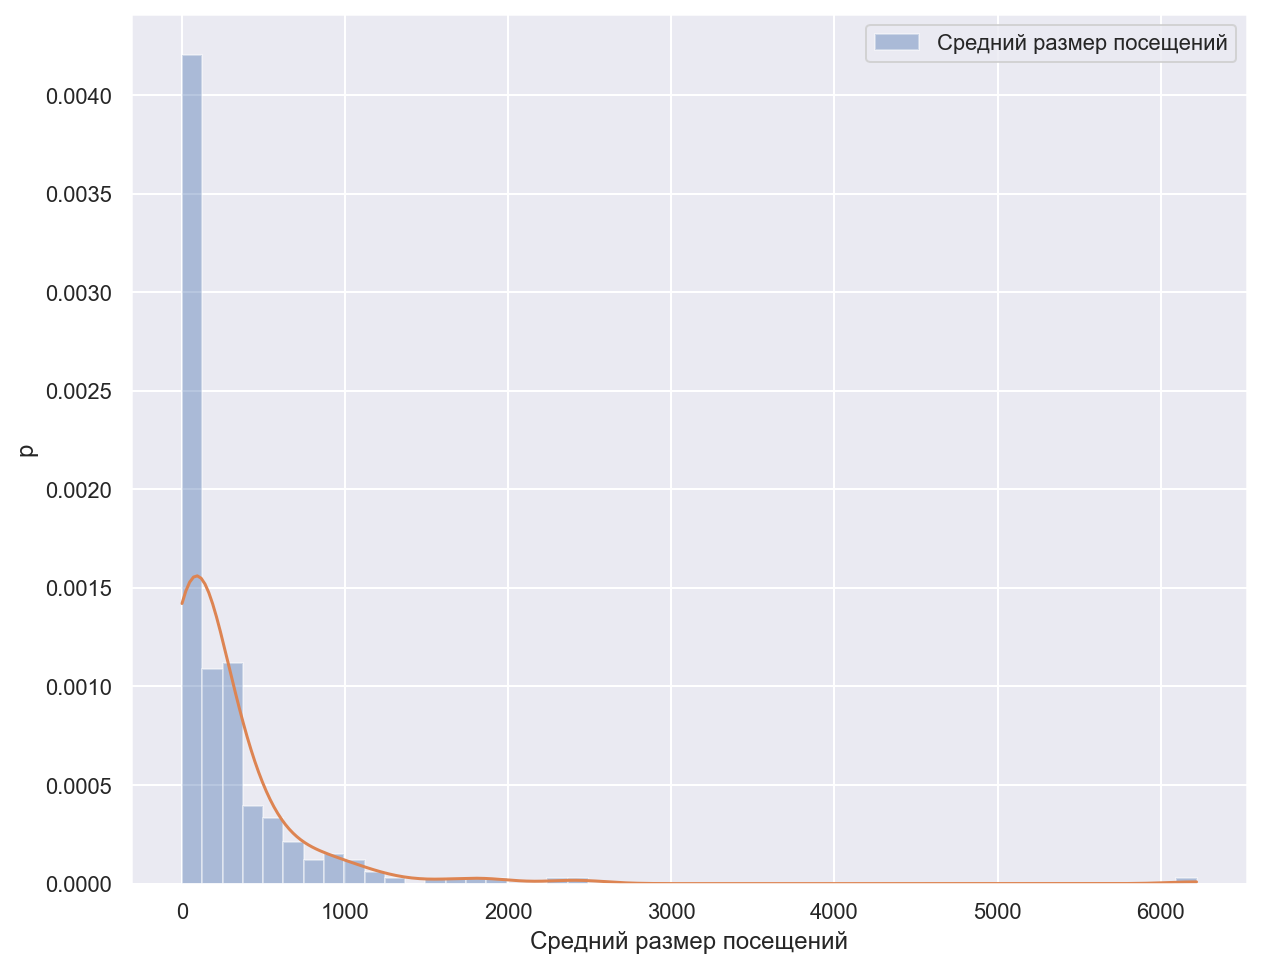

In [267]:
# Построение гистограммы и ядерной оценки плотности
plt.figure(figsize=(10, 8))

kernel = scipy.stats.gaussian_kde(df_metro['user_ratings_total'])

min_amount, max_amount = df_metro['user_ratings_total'].min(), df_metro['user_ratings_total'].max()
x = np.linspace(min_amount, max_amount, len(df_metro))
kde_values = kernel(x)


sns.distplot(df_metro['user_ratings_total'], kde=False, norm_hist=True, label=f'Средний размер посещений')
plt.plot(x, kde_values)


plt.ylabel('p')
plt.xlabel('Средний размер посещений')
# Отображаем значения по оси абсцисс только в интервале [0, 10000]
plt.legend()
plt.show()

In [268]:
df_metro = df.loc[df['closest_metro'] == "['Чернышевская']"]

# Группируем транзакции по категории, получаем среднее значение величины рейтинга
def mean_amount_by_types(df_metro):
    df_dost_types = df_metro.groupby('types', as_index=False).agg({"user_ratings_total":"mean"}, {"result":"mean"})
    # Сортируем по убыванию
    df_dost = df_dost_types.sort_values('user_ratings_total', ascending=False)

    return df_dost

df_type_dost = mean_amount_by_types(df_metro)
df_type_dost.head()

types  user_ratings_total
8  ['restaurant', 'food', 'point_of_interest', 'e...          413.988506
1  ['bar', 'restaurant', 'food', 'point_of_intere...          384.285714
7  ['night_club', 'bar', 'point_of_interest', 'es...          379.500000
0      ['bar', 'point_of_interest', 'establishment']          313.606061
3  ['cafe', 'bar', 'restaurant', 'food', 'point_o...          302.714286

In [269]:
# определим количесвто клиетов которое привлечет кафе при открытии около определнной типе ресторан или бар
# для метро чернышкевская

from math import sqrt

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns

df_metro = df.loc[df['closest_metro'] == "['Чернышевская']"]

type1, type2 = "['restaurant', 'food', 'point_of_interest', 'establishment']", "['bar', 'point_of_interest', 'establishment']"

df_type_first = df_metro.loc[df_metro['types'] == type1]
df_type_second = df_metro.loc[df_metro['types'] == type2]

print(f'Количество кафе около метро  {type1}: {len(df_type_first)}')
print(f'Количество кафе около метро  {type2}: {len(df_type_second)}')

Количество кафе около метро  ['restaurant', 'food', 'point_of_interest', 'establishment']: 87
Количество кафе около метро  ['bar', 'point_of_interest', 'establishment']: 33


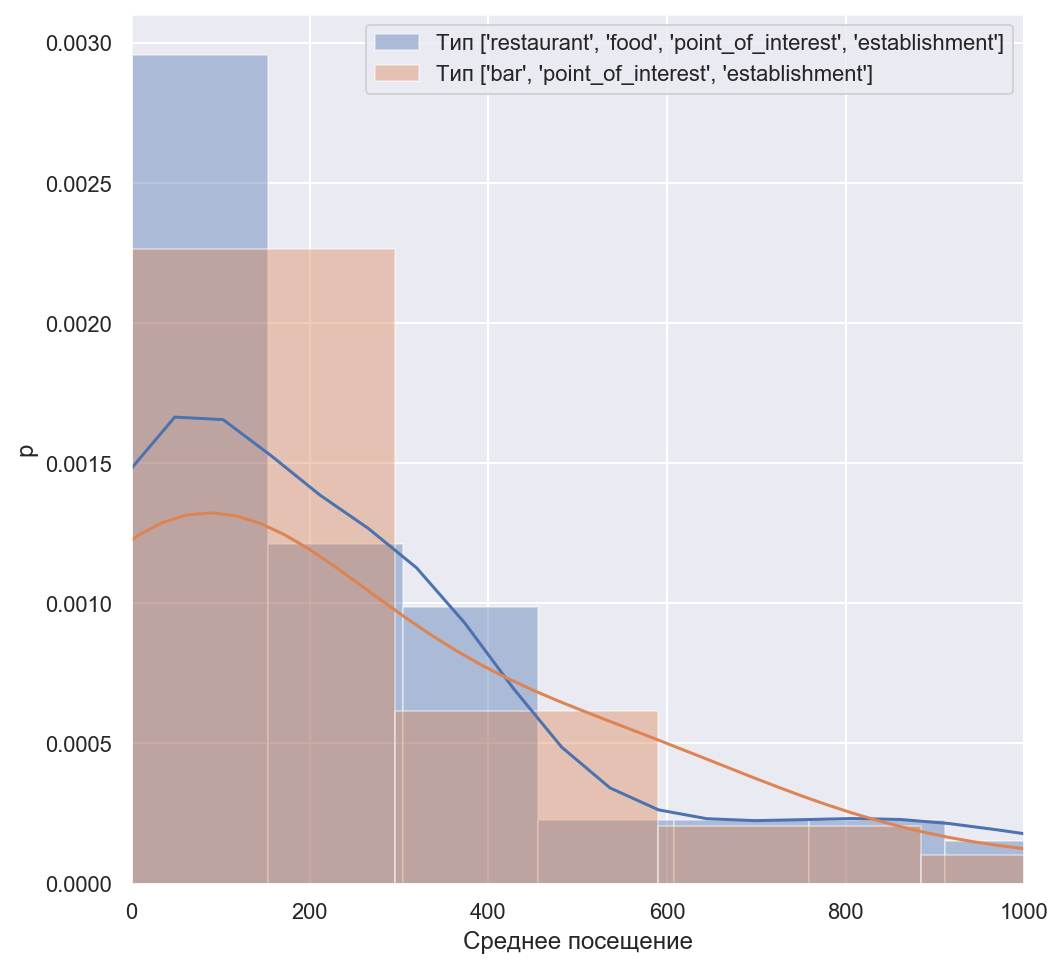

In [270]:
# Построение гистограммы и ядерной оценки плотности
plt.figure(figsize=(8, 8))
sns.distplot(df_type_first['user_ratings_total'], kde=True, norm_hist=True, label=f'Тип {type1}')
sns.distplot(df_type_second['user_ratings_total'], kde=True, norm_hist=True, label=f'Тип {type2}')

plt.ylabel('p')
plt.xlabel('Среднее посещение')
plt.xlim(0, 1000)
plt.legend()
plt.show()

In [271]:
# Расчет доверительных интервалов для 25%, 50% и 75% квантилей

def conf_intervals(data, qn):
    # 95% квантиль распределения Гаусса
    norm_q95 = scipy.stats.norm.ppf(0.95)
    kernel = scipy.stats.gaussian_kde(data)

    p25 = len(data[data < qn[5]]) / len(data)
    sigma25 = \
        (sqrt((p25 * (1 - p25)) / len(data))) / kernel(qn[5])
    p50 = len(data[data < qn[10]]) / len(data)
    sigma50 = \
        (sqrt((p50 * (1 - p50)) / len(data))) / kernel(qn[10])
    p75 = len(data[data < qn[15]]) / len(data)
    sigma75 = \
        (sqrt((p75 * (1 - p75)) / len(data))) / kernel(qn[15])

    conf_q25 = norm_q95 * sigma25
    conf_q50 = norm_q95 * sigma50
    conf_q75 = norm_q95 * sigma75

    return [conf_q25, conf_q50, conf_q75]

# Расчет квантилей
percs = np.linspace(0, 100, 21)
qn_first = np.percentile(df_type_first['user_ratings_total'], percs)
qn_second = np.percentile(df_type_second['user_ratings_total'], percs)

conf_first = conf_intervals(df_type_first['user_ratings_total'], qn_first)
conf_second = conf_intervals(df_type_second['user_ratings_total'], qn_second)

print(f'25%, 50%, 75% - доверительные интервалы для общепита около метро Чернышевская с типом {type1}:\n {conf_first}')
print(f'25%, 50%, 75% - доверительные интервалы для общепита около метро Чернышевская с типом {type2}:\n {conf_second}')
# значит что например для кватили 50 % возможно отклонение 69 единиц. в обе стороны

25%, 50%, 75% - доверительные интервалы для общепита около метро Чернышевская с типом ['restaurant', 'food', 'point_of_interest', 'establishment']:
 [array([88.06816297]), array([95.47889849]), array([96.05818942])]
25%, 50%, 75% - доверительные интервалы для общепита около метро Чернышевская с типом ['bar', 'point_of_interest', 'establishment']:
 [array([113.37044133]), array([123.77679229]), array([197.38748409])]


In [272]:
percs = np.linspace(0, 100, 5)
qn1_first = np.percentile(df_type_first['user_ratings_total'], percs)
print(percs, qn1_first)
# выводы
# для первого типа, 25 процентов кафе имеют имеют оценки 36 ниже, 50 процентов кафе имеет оценки 202 и ниже, 75 процентов кафе имеют 376 оценок и ниже. а остальные 25 процентов имеют оценки выше 376

# для второго типа все намного лучше
qn1_second = np.percentile(df_type_second['user_ratings_total'], percs)
print(percs, qn1_second)
# значит что здесь лучше открывать общепит 1 типа

[  0.  25.  50.  75. 100.] [1.000e+00 3.650e+01 2.080e+02 3.805e+02 6.219e+03]
[  0.  25.  50.  75. 100.] [1.000e+00 8.000e+00 1.060e+02 4.980e+02 2.356e+03]


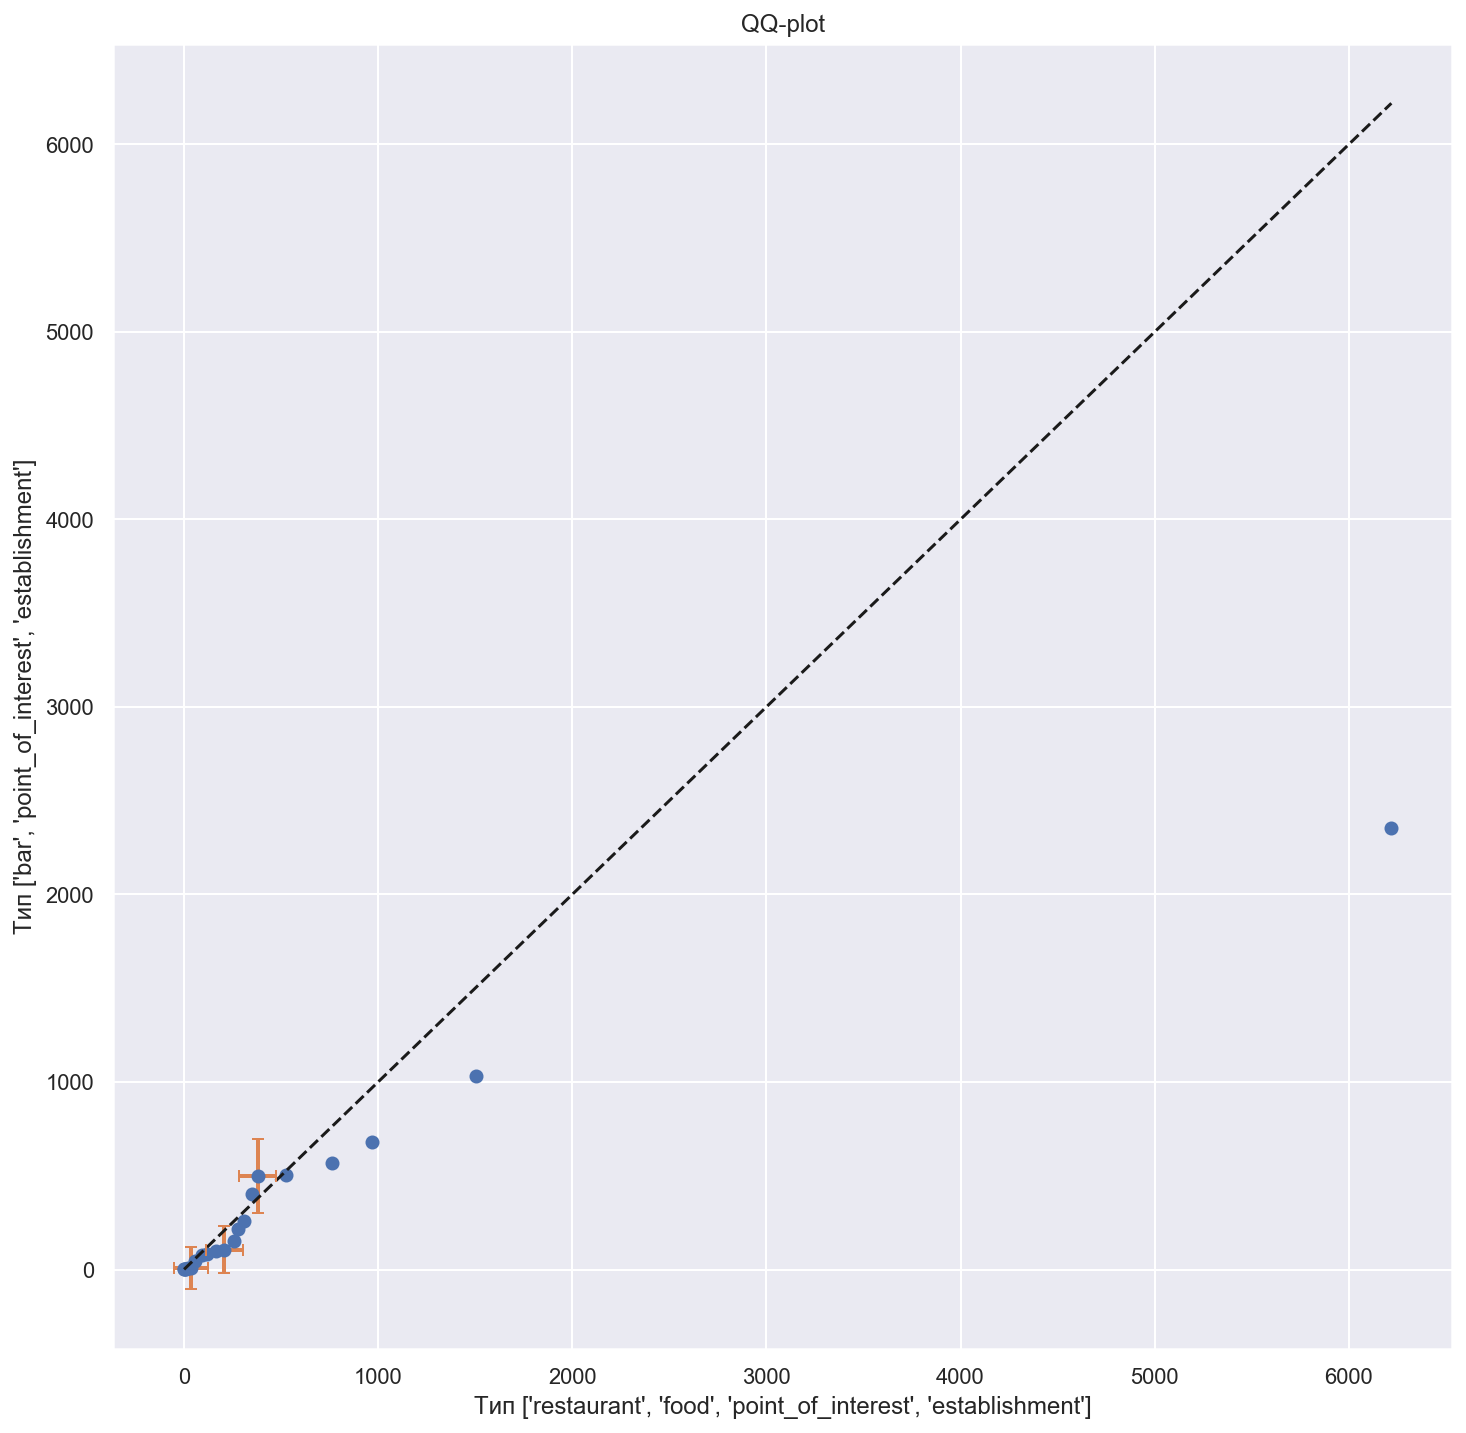

In [273]:
# Построение квантильного биплота для двух случайных величин
plt.figure(figsize=(12, 12))

min_qn = np.min([qn_first.min(), qn_second.min()])
max_qn = np.max([qn_first.max(), qn_second.max()])
x = np.linspace(min_qn, max_qn)

plt.plot(qn_first, qn_second, ls="", marker="o", markersize=6)
plt.plot(x, x, color="k", ls="--")
plt.xlabel(f'Тип {type1}')
plt.ylabel(f'Тип {type2}')
#plt.xlim([min_qn, 400])
#plt.ylim([min_qn, 400])
plt.grid(True)

# Добавление доверительных интервалов на график
plt.errorbar(
    # [25%, 50%, 75%]
    [qn_first[5], qn_first[10], qn_first[15]],
    [qn_second[5], qn_second[10], qn_second[15]],
    xerr=conf_first,
    yerr=conf_second,
    ls='none',
    capsize=3,
    elinewidth=2
)

plt.title('QQ-plot')
plt.show()

# здесь изображеы квантили и из доверительные интервалы для каждого из типов

(array([20.,  4.,  6.,  1.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([1.0000e+00, 2.3650e+02, 4.7200e+02, 7.0750e+02, 9.4300e+02,
        1.1785e+03, 1.4140e+03, 1.6495e+03, 1.8850e+03, 2.1205e+03,
        2.3560e+03]),
 <a list of 10 Patch objects>)

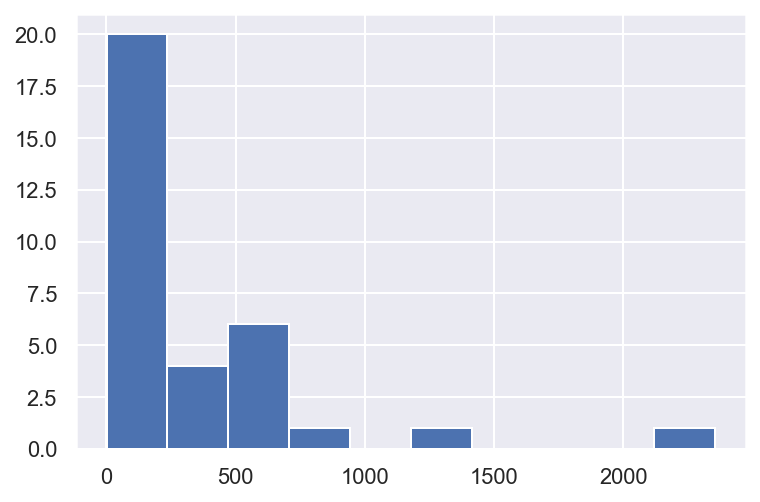

In [274]:
plt.hist(df_type_second['user_ratings_total'])

In [275]:
# Определение параметров логнормального распределения средней величины транзакции для типа1
x = np.linspace(np.min(df_type_first['user_ratings_total']), np.max(df_type_second['user_ratings_total']))

# Параметры распределения определяются при помощи функции fit на основе метода максимального правдоподобия 
params = scipy.stats.gamma.fit(df_type_first['user_ratings_total'])
pdf = scipy.stats.gamma.pdf(x, *params)

In [276]:
# Расчет критерия Колмогорова-Смирнова и хи-квадрат
ks = scipy.stats.kstest(df_type_first['user_ratings_total'], 'gamma', params, N=100)
chi2 = scipy.stats.chisquare(df_type_first['user_ratings_total'])
print(ks) # Вывод: p-value > 0.05 => значит мы принимаем гипотезу
print(chi2) # Вывод: 

KstestResult(statistic=0.9505034503129162, pvalue=0.0)
Power_divergenceResult(statistic=127268.52619596302, pvalue=0.0)


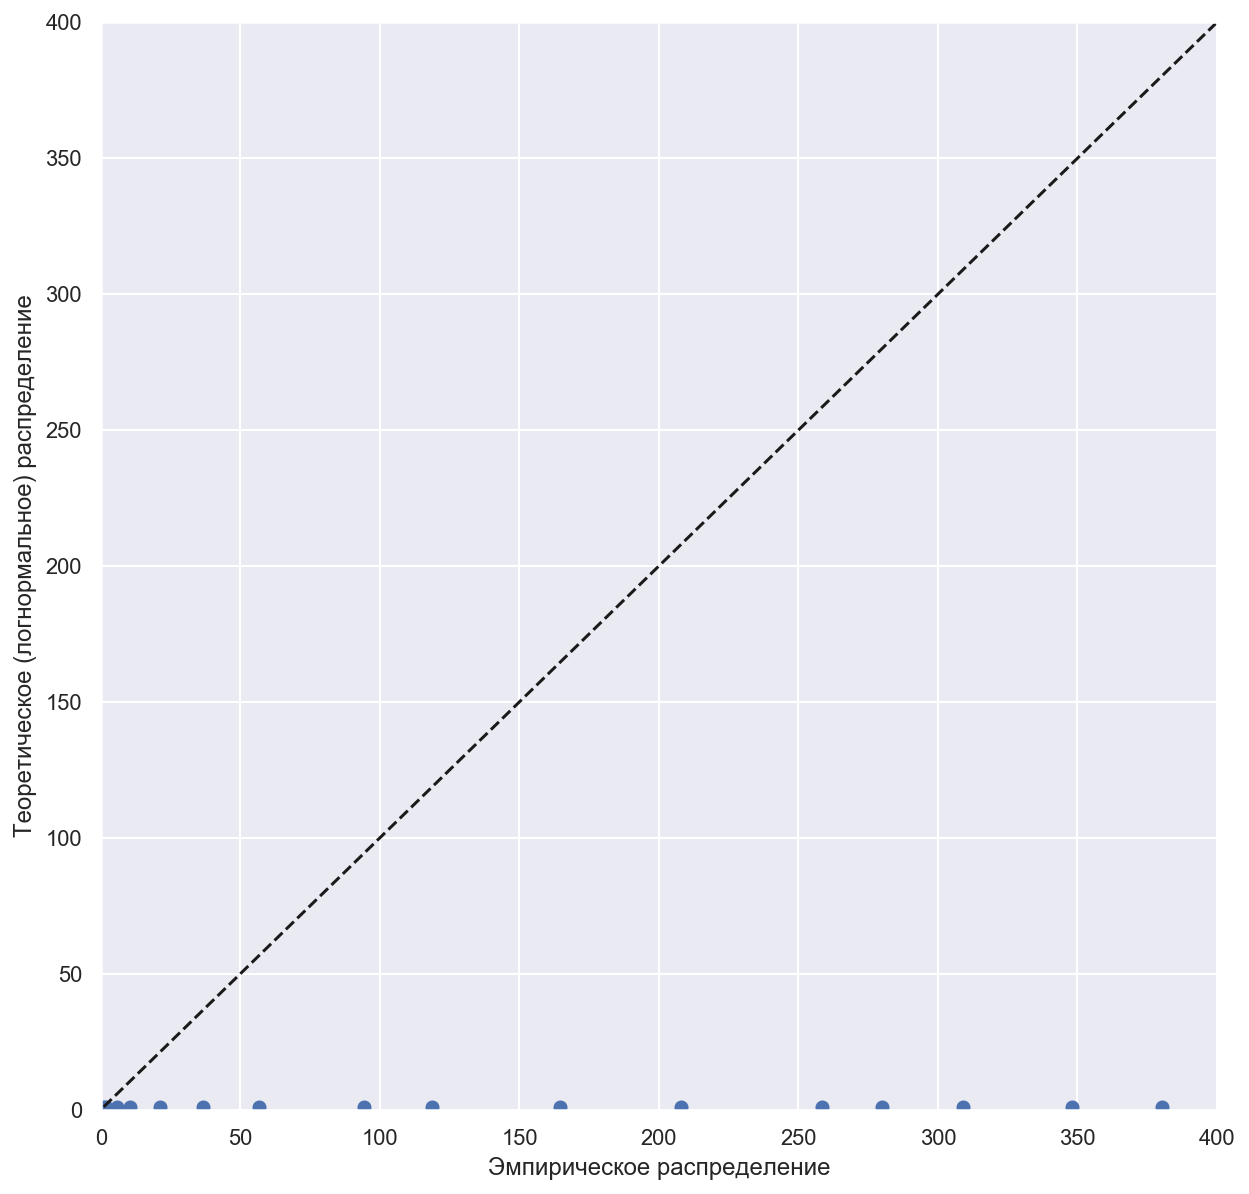

In [277]:
# Построение квантильного биплота для эмпирического и теоретического (гамма) распределения

# Расчет квантилей
percs = np.linspace(0, 100, 21)
qn_first = np.percentile(df_type_first['user_ratings_total'], percs)
qn_gamma = scipy.stats.gamma.ppf(percs / 100.0, *params)

# Построение квантильного биплота
plt.figure(figsize=(10, 10))
plt.plot(qn_first, qn_gamma, ls="", marker="o", markersize=6)
plt.plot(x, x, color="k", ls="--")
plt.xlim(0, 400)
plt.ylim(0, 400)
plt.xlabel(f'Эмпирическое распределение')
plt.ylabel('Теоретическое (логнормальное) распределение')

plt.show()

In [278]:
# multivariate analysis
df.columns

df = df.rename(columns={"Quantity of nearest museum": "near_museum", "Quantity of nearest art_gallery": "near_art_gallery","Quantity of nearest shopping_mall":"near_mall","Quantity of nearest places_tourist_attraction":"near_attraction",\
                 "Quantity of nearest same establishment":"near_same"})

In [279]:
df.columns

Index(['name', 'price_level', 'rating', 'types', 'user_ratings_total', 'lat',
       'lng', 'closest_metro', 'closest_metro_km', 'near_museum',
       'near_art_gallery', 'near_mall', 'near_attraction', 'near_same',
       'opportunity_take_away', 'distance_to_center, km'],
      dtype='object')

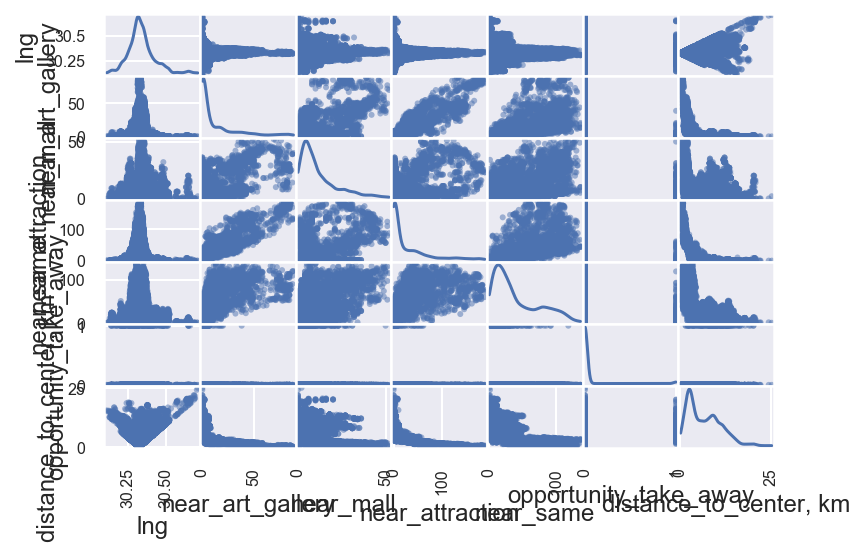

<Figure size 5000x5000 with 0 Axes>

<Figure size 5000x5000 with 0 Axes>

In [280]:
# посмотрим корреляционные матрицы
pd.plotting.scatter_matrix(df.iloc[:,[6,10,11,12,13,14,15]], diagonal="kde")
plt.tight_layout()
plt.show()
plt.figure(num=None, figsize=(50, 50), dpi=100, facecolor='w', edgecolor='k')

<Figure size 7200x7200 with 0 Axes>

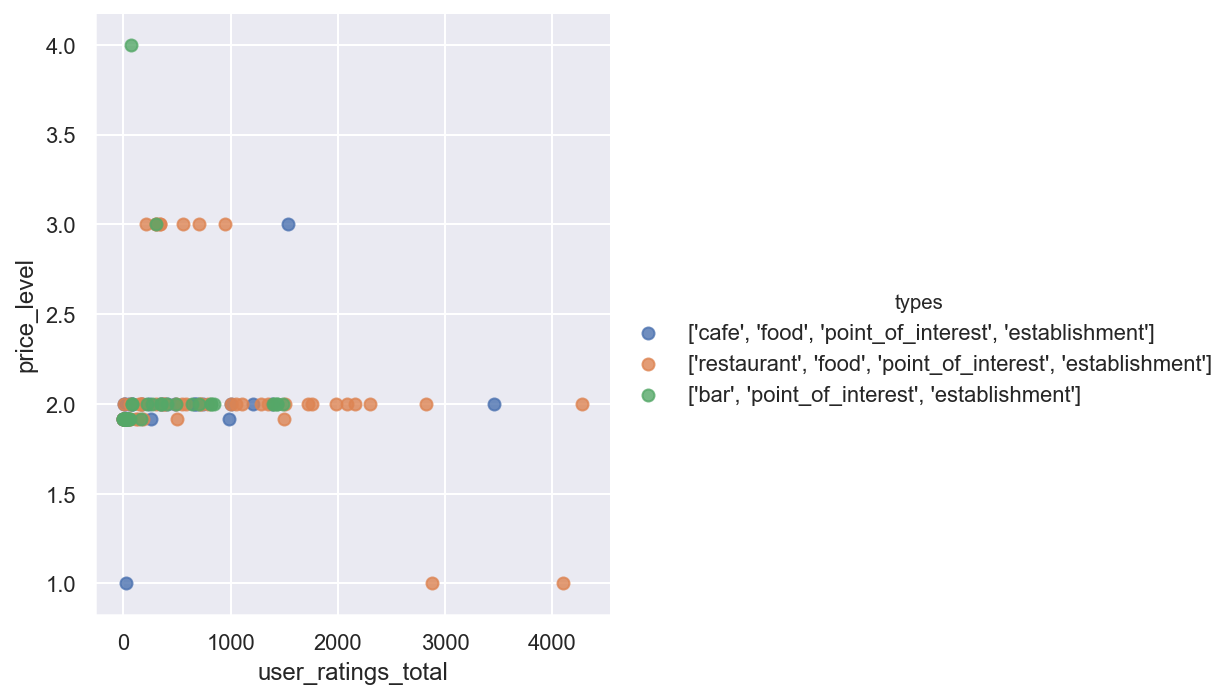

<Figure size 7200x7200 with 0 Axes>

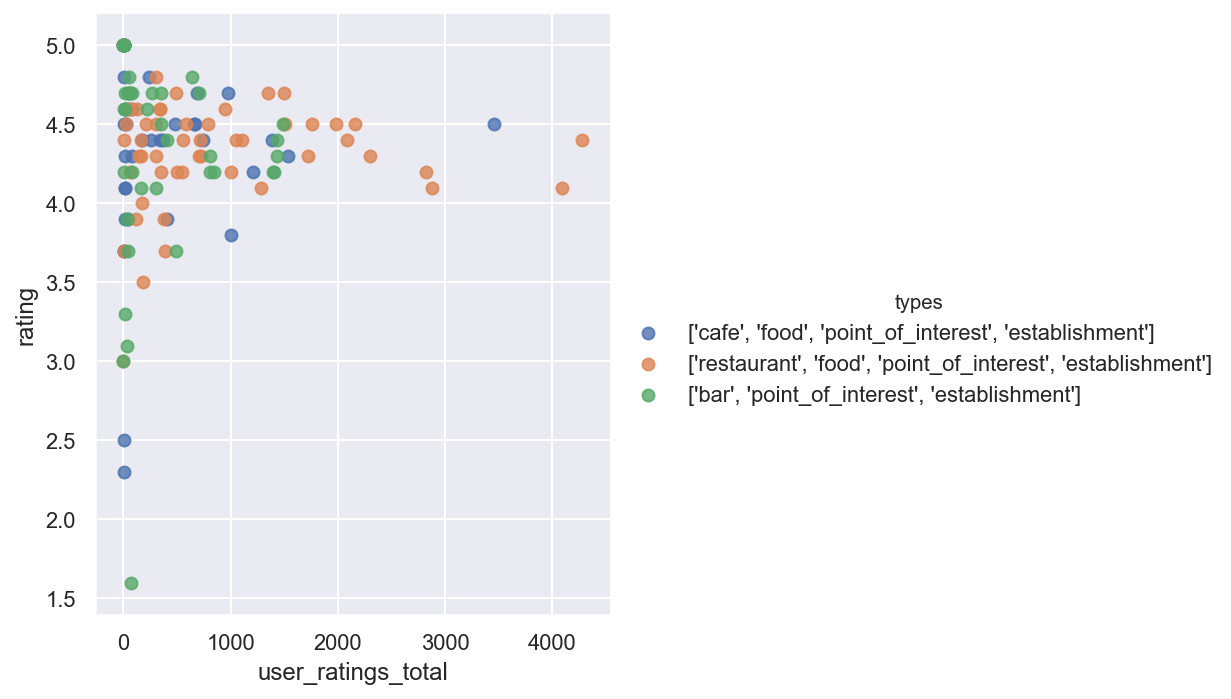

<Figure size 7200x7200 with 0 Axes>

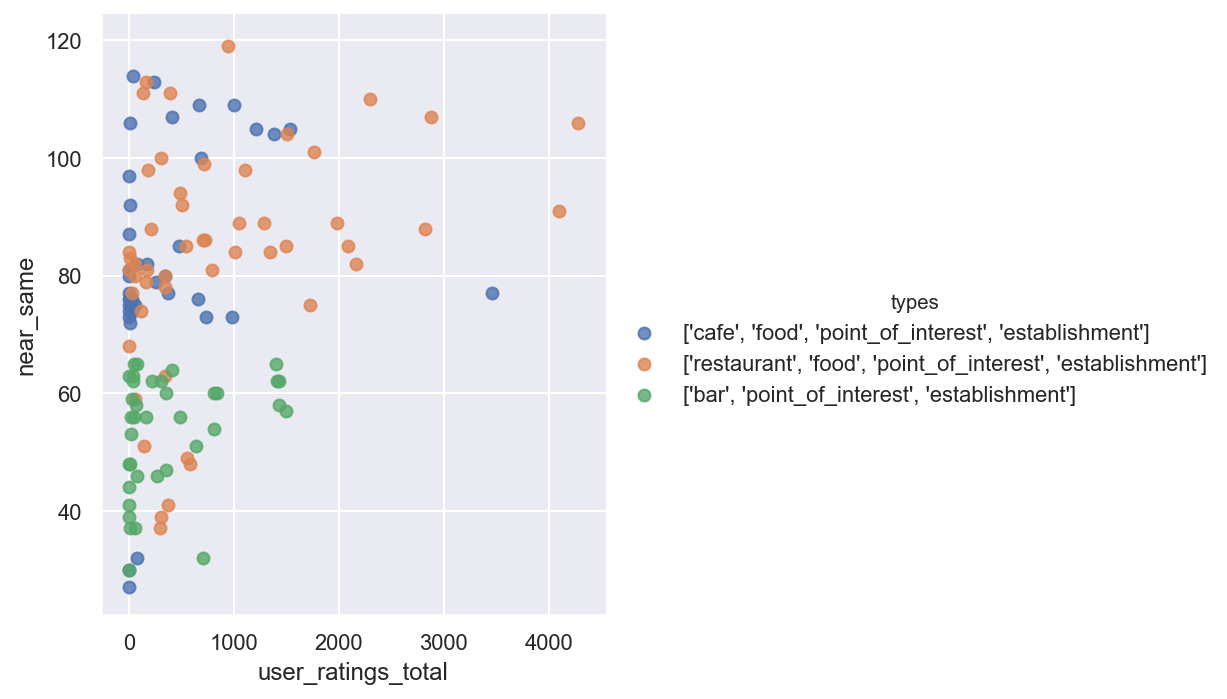

<Figure size 7200x7200 with 0 Axes>

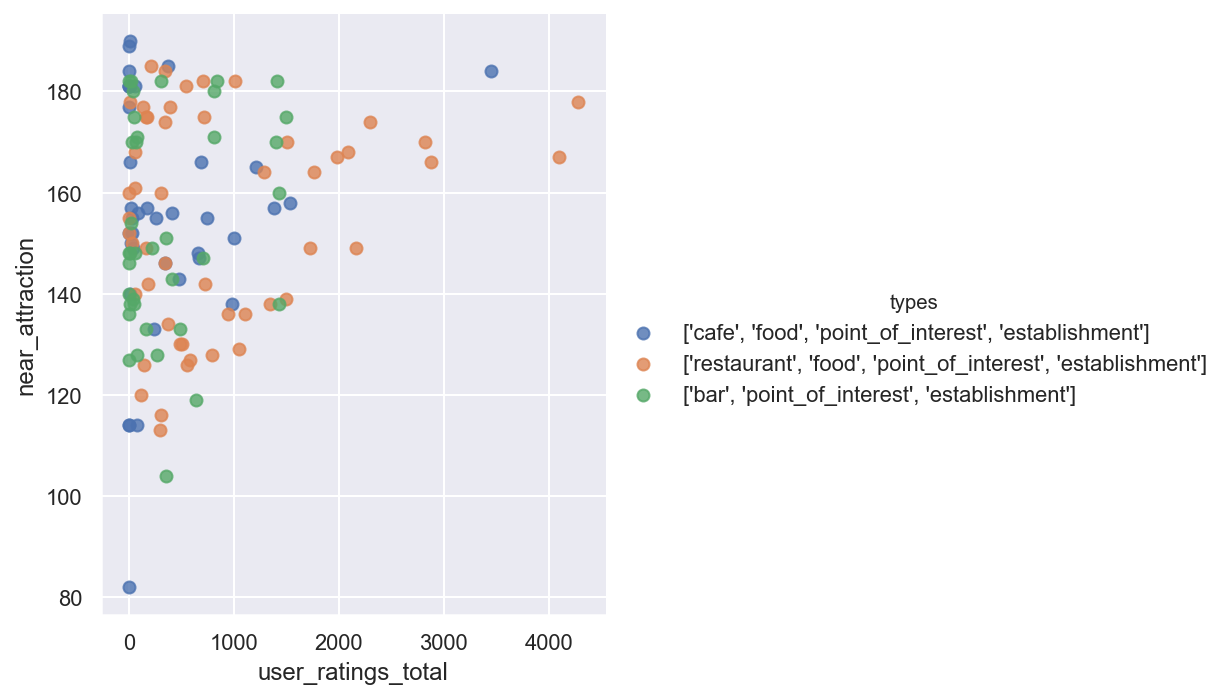

<Figure size 7200x7200 with 0 Axes>

In [281]:
#df_types_bar_restaurant_cafe = df[df['types'].isin(["['cafe', 'food', 'point_of_interest', 'establishment']" ,"['restaurant', 'food', 'point_of_interest', 'establishment']","['bar', 'point_of_interest', 'establishment']"])]
df_types_bar_restaurant_cafe = df[df['closest_metro'] =="['Гостиный Двор']"]
df_types_bar_restaurant_cafe = df_types_bar_restaurant_cafe[df_types_bar_restaurant_cafe['types'].isin(["['cafe', 'food', 'point_of_interest', 'establishment']" ,"['restaurant', 'food', 'point_of_interest', 'establishment']","['bar', 'point_of_interest', 'establishment']"])]
sns.lmplot("user_ratings_total", "price_level", df_types_bar_restaurant_cafe, hue="types", fit_reg=False)
plt.figure(figsize=(100, 100))
# можно посмотреть,открыте  вида заведения у метро Гостиный двор лучше открывать  определеным уровнем цен. Можно посмотеть наиболее востребованный уровень цен при данном типе заведения\
# так наибольшее посещение будет для бара будет с уровнем цен = 2.  как и другие типы заведений.

sns.lmplot("user_ratings_total", "rating", df_types_bar_restaurant_cafe, hue="types", fit_reg=False)
plt.figure(figsize=(100, 100))
# тоже самое мы можем сделать для общей оценки заведения - какого уровня обслуживания и еды нужно придерживаться, чтобы привлечь покупатлей.
# это 4 - 4.5

sns.lmplot("user_ratings_total", "near_same", df_types_bar_restaurant_cafe, hue="types", fit_reg=False)
plt.figure(figsize=(100, 100))

# и как влияет конкуренция на посещаемость. Никак. Расположение в изветсном районе обспечивает приток посетителей


sns.lmplot("user_ratings_total", "near_attraction", df_types_bar_restaurant_cafe, hue="types", fit_reg=False)
plt.figure(figsize=(100, 100))

# а вот нахождение в непосредсвенной близости в центре достопримечательностей - влияет

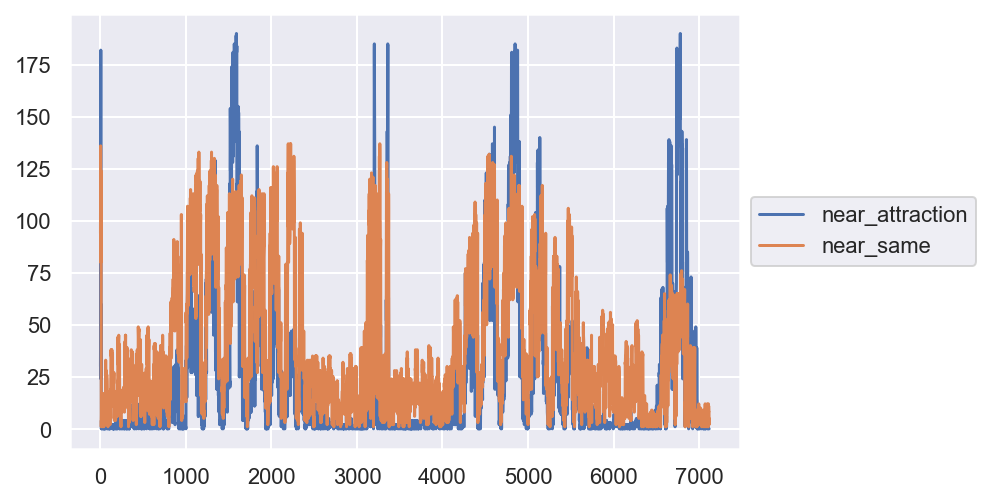

In [282]:
ax = df[["near_attraction","near_same"]].plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# можно посмотреть на график зависомти колва достопримечательностей от количесва заведений похожих 

In [283]:
# возьмем определнный тип общепита  - ресторан
df_types_restaurant = df[df['types'] == "['restaurant', 'food', 'point_of_interest', 'establishment']"]

In [284]:
df_types_restaurant.loc[:, "closest_metro_km":].apply(np.mean)

closest_metro_km           1.103902
near_museum               18.815683
near_art_gallery           9.034250
near_mall                 10.513294
near_attraction           23.975665
near_same                 38.712934
opportunity_take_away      0.000000
distance_to_center, km     6.659133
dtype: float64

In [285]:
df_types_restaurant.loc[:, "closest_metro_km":].apply(np.std)

closest_metro_km           1.516533
near_museum               31.947114
near_art_gallery          15.627759
near_mall                  9.558066
near_attraction           37.424803
near_same                 30.276733
opportunity_take_away      0.000000
distance_to_center, km     4.407029
dtype: float64

In [286]:
# корреляция внутри группы. Будем брать зависимость колва оценок от количесвта достопримечатльностей и колва подобных заведений

def calcBetweenGroupsCovariance(variable1, variable2, groupvariable):
    # find out how many values the group variable can take
    levels = sorted(set(groupvariable))
    numlevels = len(levels)
    # calculate the grand means
    variable1mean = np.mean(variable1)
    variable2mean = np.mean(variable2)
    # calculate the between-groups covariance
    Covb = 0.0
    for leveli in levels:
        levelidata1 = variable1[groupvariable==leveli]
        levelidata2 = variable2[groupvariable==leveli]
        mean1 = np.mean(levelidata1)
        mean2 = np.mean(levelidata2)
        levelilength = len(levelidata1)
        term1 = (mean1 - variable1mean) * (mean2 - variable2mean) * levelilength
        Covb += term1
    Covb /= numlevels - 1
    return Covb

In [287]:
def calcWithinGroupsCovariance(variable1, variable2, groupvariable):
    levels = sorted(set(groupvariable))
    numlevels = len(levels)
    Covw = 0.0
    # get the covariance of variable 1 and variable 2 for each group:
    for leveli in levels:
        levelidata1 = variable1[groupvariable==leveli]
        levelidata2 = variable2[groupvariable==leveli]
        mean1 = np.mean(levelidata1)
        mean2 = np.mean(levelidata2)
        levelilength = len(levelidata1)
        # get the covariance for this group:
        term1 = 0.0
        for levelidata1j, levelidata2j in zip(levelidata1, levelidata2):
            term1 += (levelidata1j - mean1)*(levelidata2j - mean2)
        Cov_groupi = term1 # covariance for this group
        Covw += Cov_groupi
    totallength = len(variable1)
    Covw /= totallength - numlevels
    return Covw

In [288]:
print(calcWithinGroupsCovariance(df.near_attraction, df.near_same, df.user_ratings_total))
print(calcBetweenGroupsCovariance(df.near_attraction, df.near_same, df.user_ratings_total))

699.8513043625402
1464.4488763959034


In [72]:
# по внутригрупповой ковариации можно сказать, что большие значения из группы оличесва аттаркторов соответсвуют большим значениям из группы конкуренции
# по межгрупповой ковариации - тоже самое - среднее в одной группе соотсевует среднему в другой

In [291]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats

corr = stats.pearsonr(df.near_same, df["distance_to_center, km"])
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])
# понятная обратная корреляция между конкуренцией и расстоянием до центра

corr = stats.pearsonr(df.user_ratings_total,df.near_attraction)
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])
# положительная корреляция между колвом аттракторов и посещаеостью

p-value:	 0.0
cor:		 -0.6924008950112642
p-value:	 6.282182571096406e-73
cor:		 0.2242624752321487


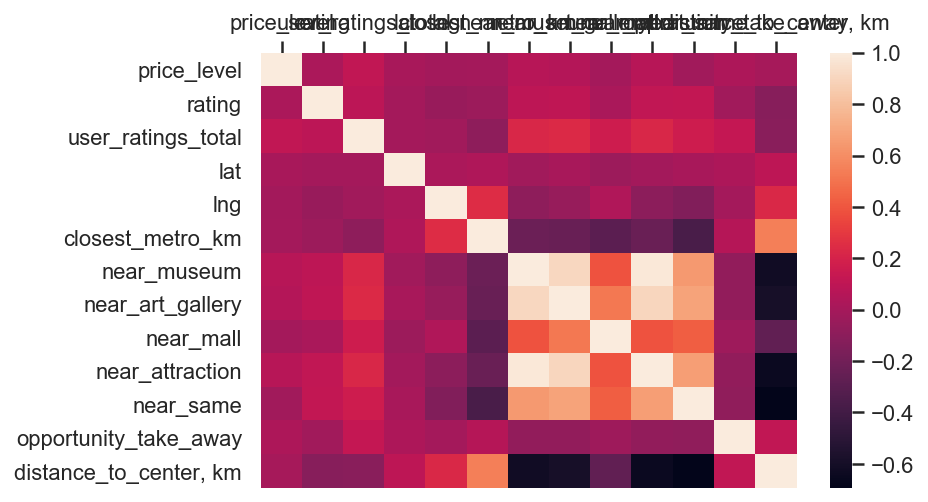

In [292]:
corrmat = df.corr()
sns.heatmap(corrmat, vmax=1., square=False).xaxis.tick_top()

In [293]:
import scipy.stats as stats

print(stats.spearmanr(df.user_ratings_total,df.near_attraction))
# видимо нелинейная корреляция

print(stats.spearmanr(df.near_same,df.near_attraction))
# очень линейная

SpearmanrResult(correlation=0.18448443566012196, pvalue=1.547789849269529e-49)
SpearmanrResult(correlation=0.760391821291129, pvalue=0.0)


In [297]:
# стандартизуем переменные
standardisedX = scale(df.drop(columns = ['name', 'types','closest_metro']))
standardisedX = pd.DataFrame(standardisedX, 
                             index=df.drop(columns = ['name', 'types','closest_metro']).index, 
                             columns=df.drop(columns = ['name', 'types','closest_metro']).columns)


In [298]:
pca = PCA().fit(standardisedX)
def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()

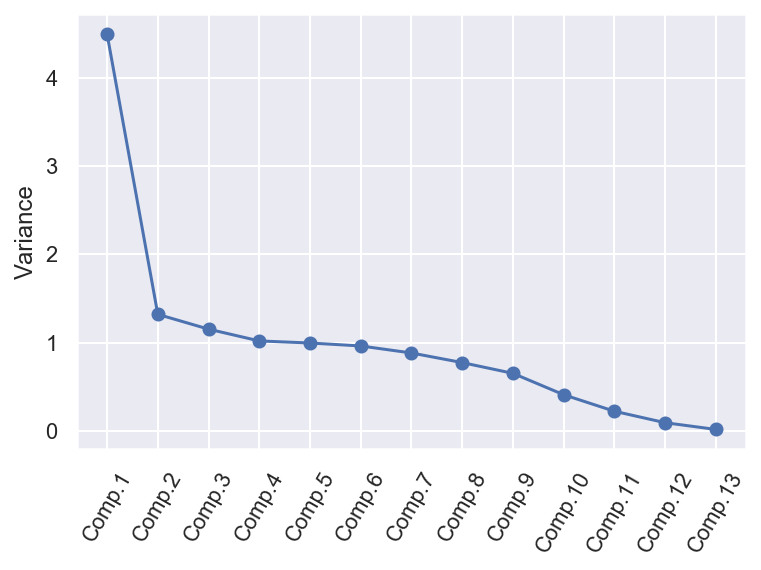

In [299]:
screeplot(pca, standardisedX)
# смотрим на график сыпи. Можно сказать,что локтем явлется lat - компонента 4 и near_same - компонента 11


In [300]:
df.drop(columns = ['name', 'types','closest_metro'])

price_level  rating  user_ratings_total        lat        lng  \
0        1.913451     3.9                37.0  59.915517  30.309495   
1        1.913451     5.0                27.0  59.924627  30.356393   
2        2.000000     4.7               308.0  59.926036  30.352349   
3        1.913451     4.7                97.0  59.931000  30.359420   
4        1.913451     4.7                24.0  59.934828  30.335022   
...           ...     ...                 ...        ...        ...   
7115     2.000000     4.8                62.0  60.070492  30.327381   
7116     1.913451     4.9                25.0  60.069987  30.326108   
7117     1.913451     4.5                 8.0  60.076130  30.342669   
7118     1.913451     4.3                11.0  60.072393  30.361603   
7119     1.913451     5.0                14.0  60.080506  30.332620   

      closest_metro_km  near_museum  near_art_gallery  near_mall  \
0             0.518818           16                 4          9   
1             0.437038           36                35         34   
2             0.296679           52                43         49   
3             0.075226           71                49         36   
4             0.111416          134                80         31   
...                ...          ...               ...        ...   
7115          0.528913            0                 0          5   
7116          0.547118            0                 0          5   
7117          1.107719            2                 2          5   
7118          1.637602            4                 0          0   
7119          1.490361            0                 0          1   

      near_attraction  near_same  opportunity_take_away  \
0                  30         94                      0   
1                  52        119                      0   
2                  67        136                      0   
3                  70        119                      0   
4                 182         80                      0   
...               ...        ...                    ...   
7115                0          8                      0   
7116                0          8                      0   
7117                0          8                      0   
7118                0          2                      0   
7119                0          5                      0   

      distance_to_center, km  
0                   2.243226  
1                   2.080040  
2                   1.805490  
3                   1.987175  
4                   0.594867  
...                      ...  
7115               15.185564  
7116               15.128704  
7117               15.845439  
7118               15.535391  
7119               16.306733  

[6325 rows x 13 columns]

In [80]:
def pca_scatter(pca, standardised_values, classifs):
    foo = pca.transform(standardised_values)
    bar = pd.DataFrame(list(zip(foo[:, 0], foo[:, 1], classifs)), columns=["PC1", "PC2", "Class"])
    sns.lmplot("PC1", "PC2", bar, hue="Class", fit_reg=False)

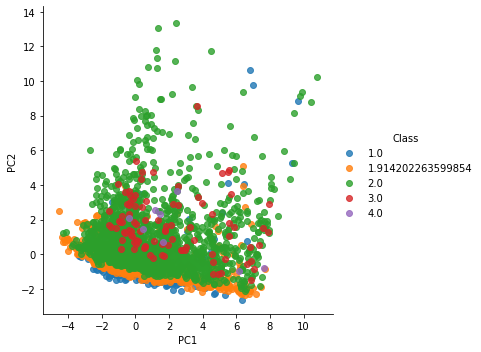

In [81]:
pca_scatter(pca, standardisedX, df.price_level)

In [82]:
# regression

In [120]:
y = df["user_ratings_total"]

In [121]:
x = df.drop(columns = ['id', 'name','plus_code', 'result', 'user_ratings_total'])
# 'types','closest_metro' - категориальные

In [122]:
#  заменяем категорийные переменные
x["types"] = x['types'].astype('category')
x["closest_metro"] = x['closest_metro'].astype('category')
cat_columns = x.select_dtypes(['category']).columns
x[cat_columns] = x[cat_columns].apply(lambda x: x.cat.codes)

In [123]:
x.head()

price_level  rating  types        lat        lng  closest_metro  \
2      1.914202     3.9      3  59.915517  30.309495             50   
3      1.914202     5.0      3  59.924627  30.356393             23   
5      2.000000     4.7      3  59.926036  30.352349             12   
9      1.914202     4.7      3  59.931000  30.359420             37   
11     1.914202     4.7      3  59.934828  30.335022              9   

    closest_metro_km  near_museum  near_art_gallery  near_mall  \
2           0.518818           16                 4          9   
3           0.437038           36                35         34   
5           0.296679           52                43         49   
9           0.075226           71                49         36   
11          0.111416          134                80         31   

    near_attraction  near_same  opportunity_take_away  distance_to_center, km  
2                30         94                      0                2.243226  
3                52        119                      0                2.080040  
5                67        136                      0                1.805490  
9                70        119                      0                1.987175  
11              182         80                      0                0.594867

In [124]:
# делим на тест и трейн

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import pylab 
from sklearn.linear_model import  LassoLarsIC

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [125]:
l = []
for i in range(len(y_test)):
    l.append(i)

#Создание модели линейной регрессии
reg = LinearRegression(normalize=True)
#Обучение модели линейной регрессии
reg.fit(X_train, y_train)
#Прогноз на тестовой выборке
y_pred = reg.predict(X_test)
params = np.append(reg.intercept_,reg.coef_)
print(params)

[ 7.54303960e+03  1.20383930e+02  6.88338639e+01  2.51591239e+01
 -1.04560537e+02 -6.13899617e+01  6.33416473e-01 -2.50138985e+01
 -1.09632170e+00  5.60047145e+00  2.95941130e+00  2.06818912e+00
 -4.47309862e-01  4.29787845e+02  1.04756640e+01]


In [126]:
#Вычисление метрик регрессии
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('Mean absolute error = ', mae)
print('Mean squared error = ', mse)

Mean absolute error =  247.21239634764478
Mean squared error =  169577.431491344


In [127]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
print('Mean absolute percentage error = ', mape)

Mean absolute percentage error =  3083.5273968522133


In [128]:
#Регуляризация лассо
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, y_train)
print(clf.coef_)

[119.08051701  68.68753098  25.15582586 -70.82109491 -40.51411033
   0.6247992  -24.39205004  -1.07029371   5.55027634   2.98406479
   2.05691894  -0.44594064 425.63708583  10.28677233]


In [129]:
model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X_train, y_train)
alpha_aic_ = model_aic.coef_
alpha_aic_

array([ 1.19676862e+02,  6.78801598e+01,  2.47250050e+01, -8.52743413e+01,
       -4.57104852e+01,  5.78007676e-01, -2.32648744e+01,  0.00000000e+00,
        5.17983585e+00,  3.01979602e+00,  1.21950923e+00, -3.49069348e-01,
        4.27413839e+02,  9.84542977e+00])

In [130]:
y_pred_lasso = clf.predict(X_test)
y_pred_lasso_aic = model_aic.predict(X_test)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso_aic = mean_absolute_error(y_test, y_pred_lasso_aic)
print('Mean absolute error with lasso = ', mae_lasso)
print('Mean squared error with lasso = ', mse_lasso)
print('Mean absolute error with aic lasso = ', mae_lasso_aic)

Mean absolute error with lasso =  247.11602438959088
Mean squared error with lasso =  169544.6680050449
Mean absolute error with aic lasso =  247.32807306162798


Text(0, 0.5, 'Популярность кафе')

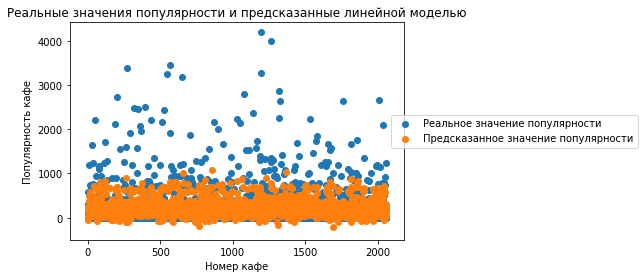

In [133]:
#График реальных и предсказанных значений
plt.scatter(l, y_test, label = u'Реальное значение популярности')
plt.scatter(l, y_pred, label = u'Предсказанное значение популярности')
plt.title(u'Реальные значения популярности и предсказанные линейной моделью')
plt.legend(loc="center right",borderaxespad=0.1, bbox_to_anchor=(1.7, 0.5))
plt.xlabel(u'Номер кафе')
plt.ylabel(u'Популярность кафе')  
# могло бы быть и лучше

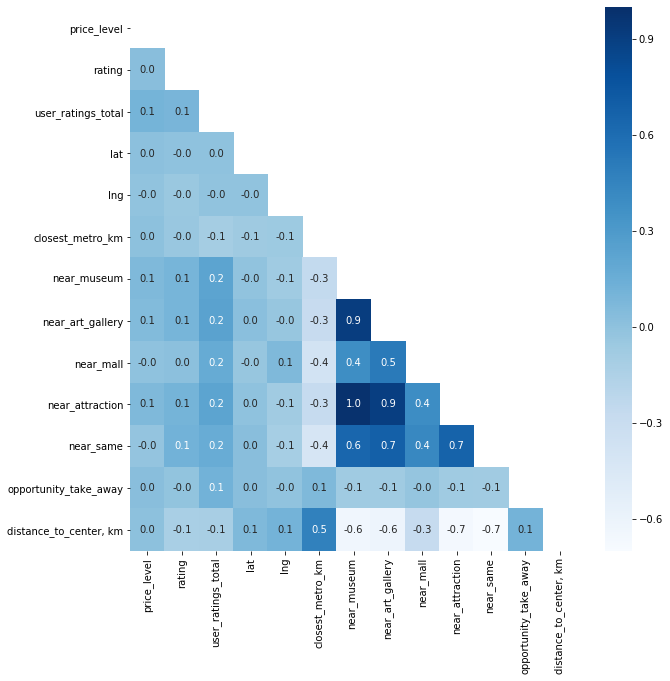

In [134]:
#Построение корреляционной матрицы признаков
dataset = df.drop(columns = ['id', 'name','plus_code', 'result'])
corr = dataset.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(corr, mask = mask, annot=True, fmt= '.1f', ax = ax, cmap = 'Blues')

In [136]:
x.columns

Index(['price_level', 'rating', 'types', 'lat', 'lng', 'closest_metro',
       'closest_metro_km', 'near_museum', 'near_art_gallery', 'near_mall',
       'near_attraction', 'near_same', 'opportunity_take_away',
       'distance_to_center, km'],
      dtype='object')

<Figure size 6400x4800 with 0 Axes>

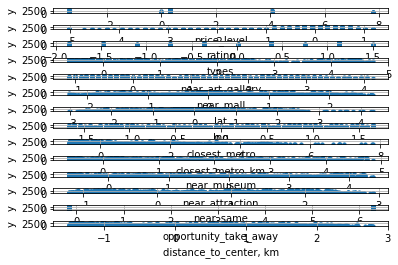

<Figure size 6400x4800 with 0 Axes>

In [147]:
#Визуальзация зависимости признаков между собой
X = x
scaler = StandardScaler()
y = y
X = pd.DataFrame(scaler.fit_transform(X))
X.columns = ['price_level', 'rating', 'types', 'lat', 'lng', 'closest_metro',
       'closest_metro_km', 'near_museum', 'near_art_gallery', 'near_mall',
       'near_attraction', 'near_same', 'opportunity_take_away',
       'distance_to_center, km']

#Создание subplot - нескольких графиков на одной картинке
fig, axs = plt.subplots(14, 1)
plt.subplots_adjust(wspace=0, hspace=2.5)
axs[0].scatter(X[['price_level']],y,s=10)
axs[0].set_xlabel('price_level')
axs[0].set_ylabel('y')
axs[0].grid(True)

axs[1].scatter(X[['rating']],y,s=10)
axs[1].set_xlabel('rating')
axs[1].set_ylabel('y')
axs[1].grid(True)

axs[2].scatter(X[['types']],y,s=10)
axs[2].set_xlabel('types')
axs[2].set_ylabel('y')
axs[2].grid(True)

axs[3].scatter(X[['near_art_gallery']],y,s=10)
axs[3].set_xlabel('near_art_gallery')
axs[3].set_ylabel('y')
axs[3].grid(True)

axs[4].scatter(X[['near_mall']],y,s=10)
axs[4].set_xlabel('near_mall')
axs[4].set_ylabel('y')
axs[4].grid(True)

axs[5].scatter(X[['lat']],y,s=10)
axs[5].set_xlabel('lat')
axs[5].set_ylabel('y')
axs[5].grid(True)

axs[6].scatter(X[['lng']],y,s=10)
axs[6].set_xlabel('lng')
axs[6].set_ylabel('y')
axs[6].grid(True)

axs[7].scatter(X[['closest_metro']],y,s=10)
axs[7].set_xlabel('closest_metro')
axs[7].set_ylabel('y')
axs[7].grid(True)

axs[8].scatter(X[['closest_metro_km']],y,s=10)
axs[8].set_xlabel('closest_metro_km')
axs[8].set_ylabel('y')
axs[8].grid(True)

axs[9].scatter(X[['near_museum']],y,s=10)
axs[9].set_xlabel('near_museum')
axs[9].set_ylabel('y')
axs[9].grid(True)

axs[10].scatter(X[['near_attraction']],y,s=10)
axs[10].set_xlabel('near_attraction')
axs[10].set_ylabel('y')
axs[10].grid(True)

axs[11].scatter(X[['near_same']],y,s=10)
axs[11].set_xlabel('near_same')
axs[11].set_ylabel('y')
axs[11].grid(True)

axs[12].scatter(X[['opportunity_take_away']],y,s=10)
axs[12].set_xlabel('opportunity_take_away')
axs[12].set_ylabel('y')
axs[12].grid(True)

axs[13].scatter(X[['distance_to_center, km']],y,s=10)
axs[13].set_xlabel('distance_to_center, km')
axs[13].set_ylabel('y')
axs[13].grid(True)



plt.figure(num=None, figsize=(80, 60), dpi=80, facecolor='w', edgecolor='k')


In [153]:
#Отбор шести самых значимых признаков
X = x[['near_attraction','near_same','distance_to_center, km',"closest_metro_km",'closest_metro', 'types']]
#Нормирование признаков
scaler = StandardScaler()
y = df[['user_ratings_total']]
X = pd.DataFrame(scaler.fit_transform(X))
X.columns = ['near_attraction','near_same','distance_to_center, km',"closest_metro_km",'closest_metro', 'types']
scaler = StandardScaler()
y = pd.DataFrame(scaler.fit_transform(y))
y.columns = ['user_ratings_total']
#Деление на тестовую и тренировочную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
#Создание и обучение модели линейной регрессии
reg = LinearRegression(normalize=True)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
y_pred_all = np.array(reg.predict(X))

In [154]:
#Вычисление метрик модели
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('Mean absolute error = ', mae)
print('Mean squared error = ', mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
print('Mean absolute percentage error = ', mape)

Mean absolute error =  0.557150853196251
Mean squared error =  0.9060920850883442
Mean absolute percentage error =  user_ratings_total    142.729398
dtype: float64


Text(0, 0.5, 'Предсказанные значения')

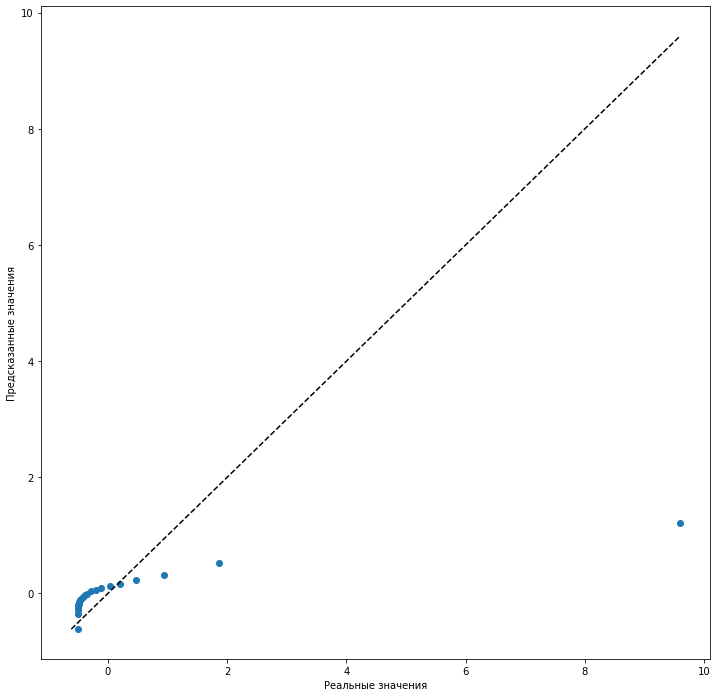

In [157]:
#Построение квантильного биплота по реальным и предсказанным значениям
percs = np.linspace(0, 100, 21)
qn_first = np.percentile(y, percs)
qn_second = np.percentile(y_pred_all, percs)
plt.figure(figsize=(12, 12))

min_qn = np.min([qn_first.min(), qn_second.min()])
max_qn = np.max([qn_first.max(), qn_second.max()])
x = np.linspace(min_qn, max_qn)

plt.plot(qn_first, qn_second, ls="", marker="o", markersize=6)
plt.plot(x, x, color="k", ls="--")

plt.xlabel(u'Реальные значения')
plt.ylabel(u'Предсказанные значения')

Text(0, 0.5, 'Популярность')

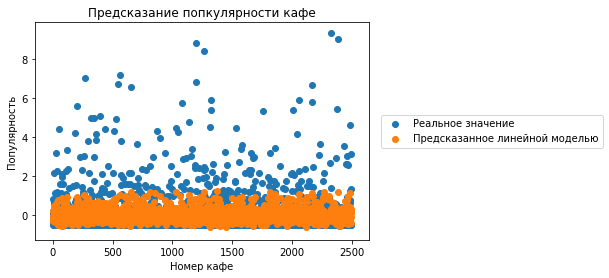

In [159]:
x = []

for i in range(len(y_test)):
    x.append(i)
#График реальных и предсказанных значений
plt.scatter(x, y_test, label = u'Реальное значение')
plt.scatter(x, y_pred, label = u'Предсказанное линейной моделью')
plt.title(u"Предсказание попкулярности кафе")
plt.legend(loc="center right",borderaxespad=0.1, bbox_to_anchor=(1.7, 0.5))
plt.xlabel(u'Номер кафе')
plt.ylabel('Популярность')

In [160]:
#Построение и обучение полиномиальной регрессии 2-й степени
poly = PolynomialFeatures(2)
X_train_new = poly.fit_transform(X_train)
poly = PolynomialFeatures(2)
X_test_new = poly.fit_transform(X_test)
reg = LinearRegression(normalize=True)
reg.fit(X_train_new, y_train)
y_pred_poly = reg.predict(X_test_new)
X_new = poly.fit_transform(X)
y_pred_poly_all = reg.predict(X_new)

Text(0, 0.5, 'Предсказанные значения')

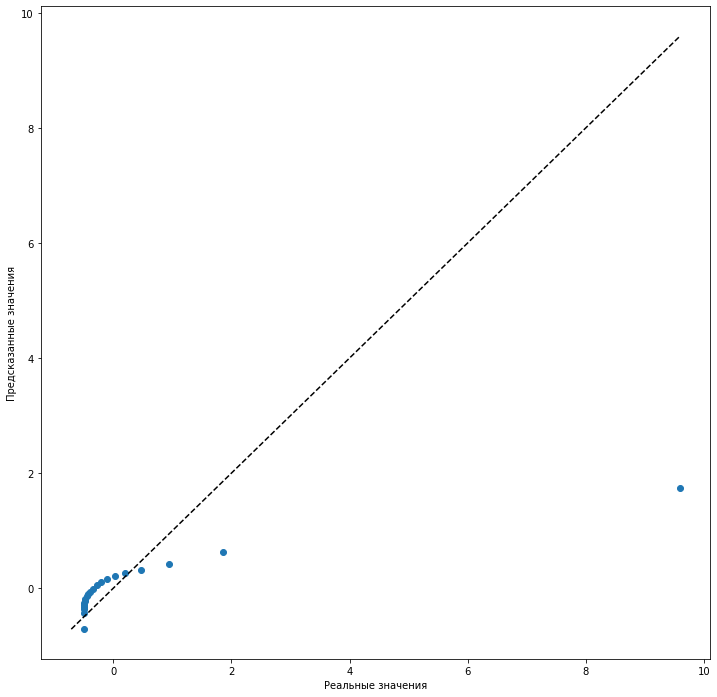

In [161]:
#Построение квантильного биплота по реальным и предсказанным значениям
percs = np.linspace(0, 100, 21)
qn_first = np.percentile(y, percs)
qn_second = np.percentile(y_pred_poly_all , percs)
plt.figure(figsize=(12, 12))

min_qn = np.min([qn_first.min(), qn_second.min()])
max_qn = np.max([qn_first.max(), qn_second.max()])
x = np.linspace(min_qn, max_qn)

plt.plot(qn_first, qn_second, ls="", marker="o", markersize=6)
plt.plot(x, x, color="k", ls="--")

plt.xlabel(u'Реальные значения')
plt.ylabel(u'Предсказанные значения')

In [162]:
#Вычисление метрик модели
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
print('Mean absolute error with Polynomial model = ', mae_poly)
print('Mean squared error with Polynomial model = ', mse_poly)

Mean absolute error with Polynomial model =  0.5393143088257252
Mean squared error with Polynomial model =  0.8713549737531769


Text(0, 0.5, 'Популярность')

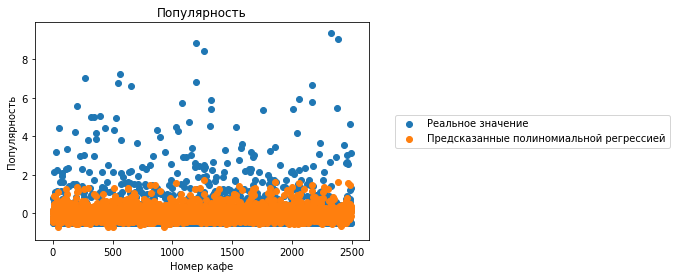

In [163]:
x = []
#Визуализация реальных и предсказанных значений
for i in range(len(y_test)):
    x.append(i)
plt.scatter(x, y_test, label = u'Реальное значение')
plt.scatter(x, y_pred_poly, label = u'Предсказанные полиномиальной регрессией')
plt.title(u'Популярность')
plt.legend(loc="center right",borderaxespad=0.1, bbox_to_anchor=(1.9, 0.5))
plt.xlabel(u'Номер кафе')
plt.ylabel('Популярность')


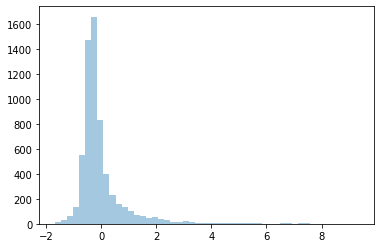

In [167]:
#Построение распределения остатков
y1 = np.array(y)
y2 = np.array(y_pred_all)
y_diff = y1[:,0] - y2[:,0]
sns.distplot(y_diff, kde=False)

In [165]:
#Confidence interval of regression coef 
import statsmodels.api as sm
mod = sm.OLS(y_train, X_train)
res = mod.fit()
print (res.conf_int(0.01))  

                               0         1
near_attraction         0.215142  0.337706
near_same              -0.033113  0.092018
distance_to_center, km  0.071247  0.200058
closest_metro_km       -0.122620 -0.028032
closest_metro          -0.021358  0.062532
types                   0.098393  0.180424
